<a href="https://colab.research.google.com/github/23aswathy/ASWATHY-G/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [27]:
from google.colab import files
files.upload()

Saving bank_full.csv to bank_full (1).csv


{'bank_full (1).csv': b'age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y\r\n56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no\r\n57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no\r\n37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no\r\n40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no\r\n56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no\r\n45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no\r\n59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent

In [28]:
#Reading the dataset
data=pd.read_csv('bank_full.csv')

In [ ]:
#Input variables:
  # bank client data:
#age :age of customer
#job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
#marital : marital status (categorical: 'divorced','married','single','unknown')
#education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
#default: has credit in default? (categorical: 'no','yes','unknown')
#housing: has housing loan? (categorical: 'no','yes','unknown')
#loan: has personal loan? (categorical: 'no','yes','unknown')
#related with the last contact of the current campaign:
#contact: contact communication type
#month: last contact month of year
#day_of_week: last contact day of the week
#duration: last contact duration, in seconds (numeric)
#campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#previous: number of contacts performed before this campaign and for this client (numeric)
#poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#emp.var.rate: employment variation rate - quarterly indicator (numeric)
#cons.price.idx: consumer price index - monthly indicator (numeric)
#cons.conf.idx: consumer confidence index - monthly indicator (numeric)
#euribor3m: euribor 3 month rate - daily indicator (numeric)
#nr.employed: number of employees - quarterly indicator (numeric)
  Output variable :
# y - has the client subscribed a term deposit? (binary: "yes","no")




In [29]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [ ]:
data.shape

(41188, 21)

In [ ]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
for a in list(data.columns):

    # get a list of unique values
    n = data[a].unique()

    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<20:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')


age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays: 27 unique values
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx: 26 unique values
cons.conf.idx: 26 unique values
euribor3m: 316 unique values
nr.employed
[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]
y
['no' 'ye

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
cat_columns = data.select_dtypes(include=['object']).columns
num_columns=data.select_dtypes(include=['int64','float64']).columns

In [ ]:
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
num_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
df=data[num_columns].corr()

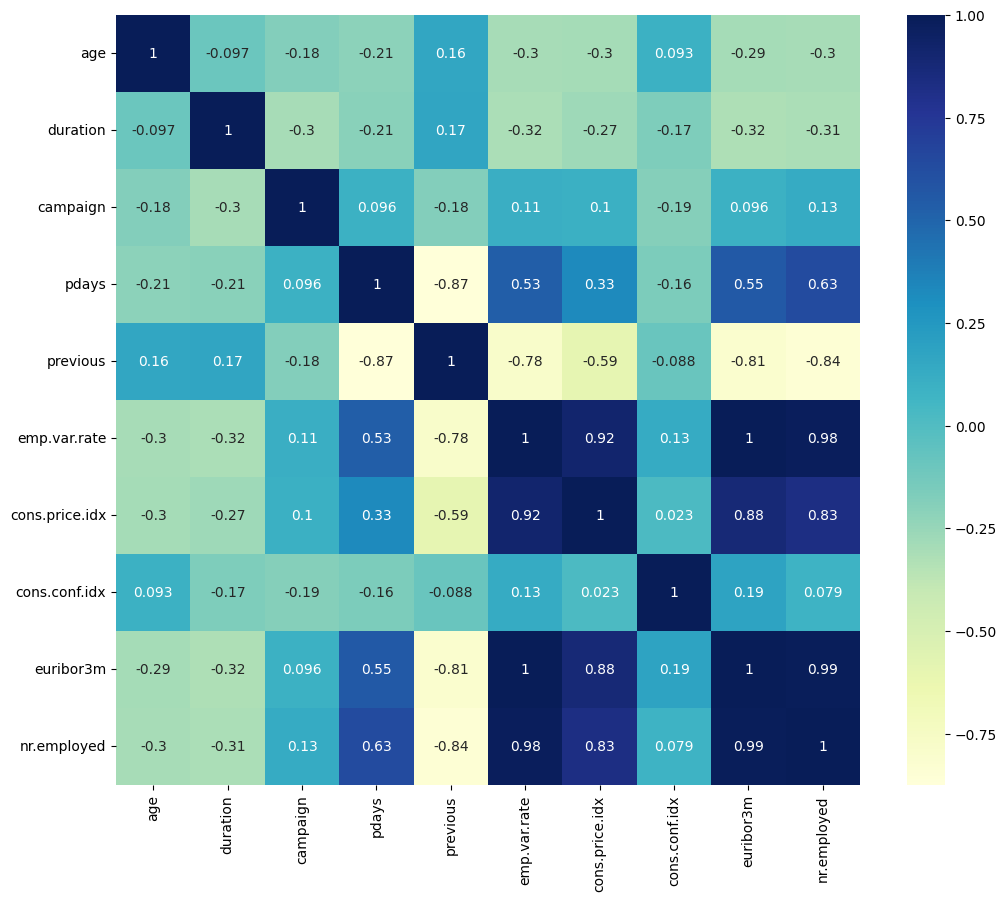

In [ ]:
fig = plt.figure(figsize= (12, 10))
corr_df = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
#High correlation exists between emp.var.rate,euribor3m with nr.employed(0.98,0.99)
#High correlation exists between cons.price.idx and nr.employed(0.83)
#High correlation exists between cons.price.idx and nr.employed(0.83)
#High correlation exists between cons.price.idx and euribor3m(0.88)
#High correlation exists between emp.var.rate and cons.price.idx(0.92)



In [ ]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)
        print('\n')
        print('the values are:')
        print(data[i].value_counts())
        print('\n\n')

job


the values are:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64



marital


the values are:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64



education


the values are:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64



default


the values are:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64



housing


the values are:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64



loan




In [ ]:
for i in data.columns:
    x = data[i].value_counts()
    print(data[i].value_counts())

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, 

In [ ]:
print(data["job"].value_counts())
print(data["marital"].value_counts())
print(data["education"].value_counts())
print(data["y"].value_counts())


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
y
no     36548
yes     4640
Name: count, dtype: int64


In [ ]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()


In [ ]:
def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
    # ax.legend(labels=["no","yes"])
  plt.show()

<ipython-input-22-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


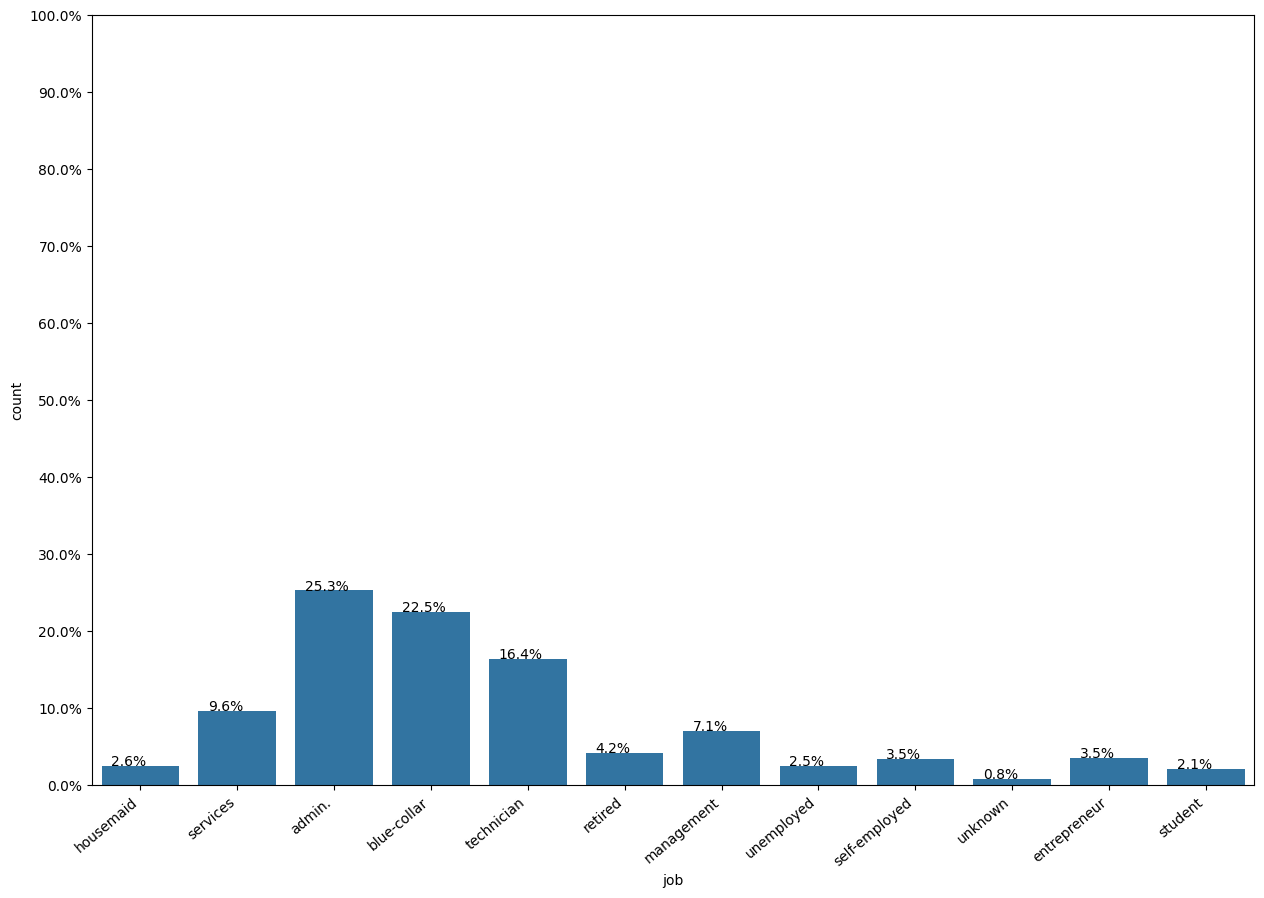

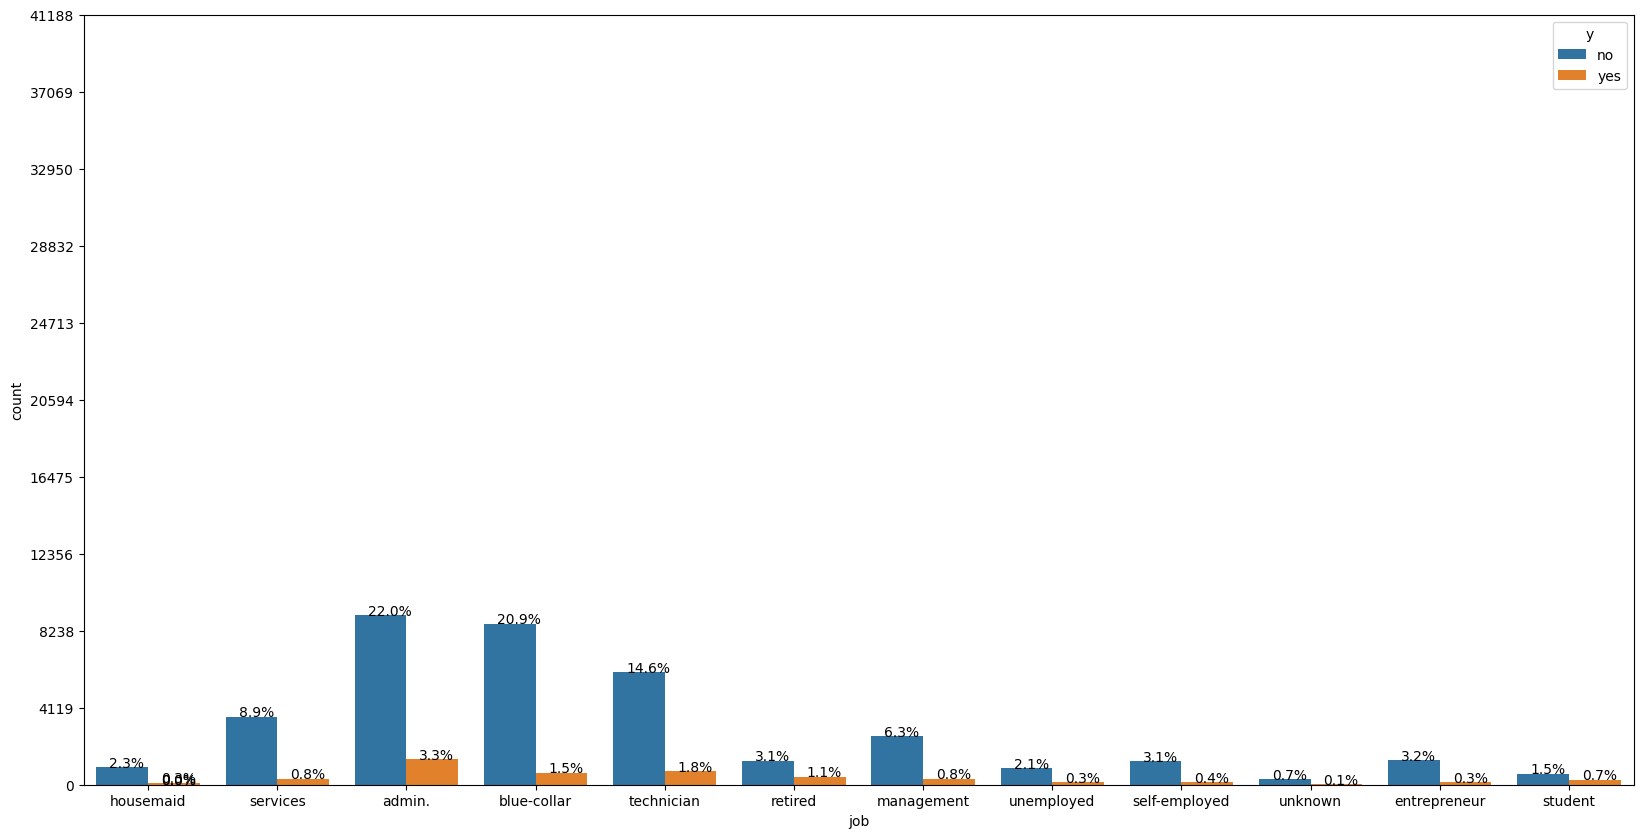

<ipython-input-22-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


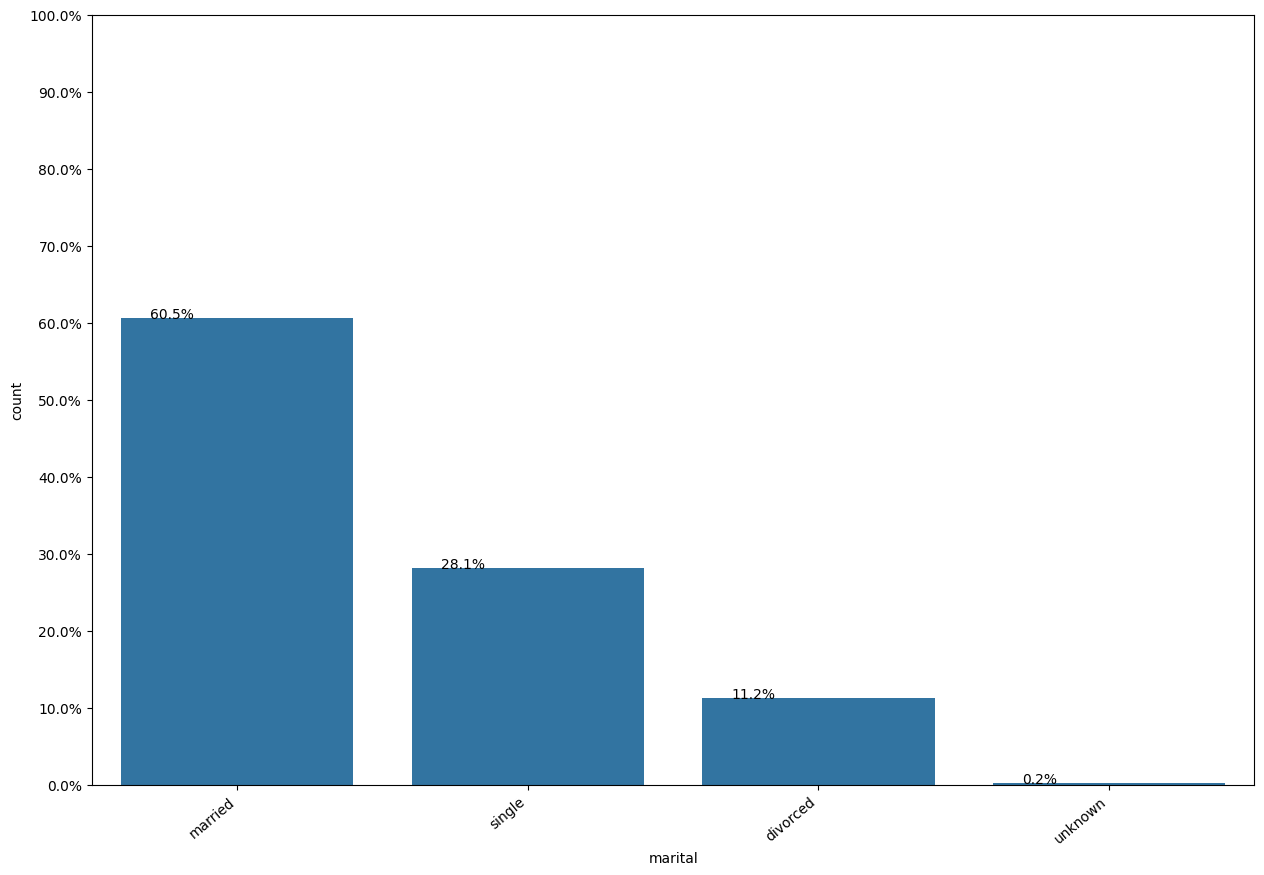

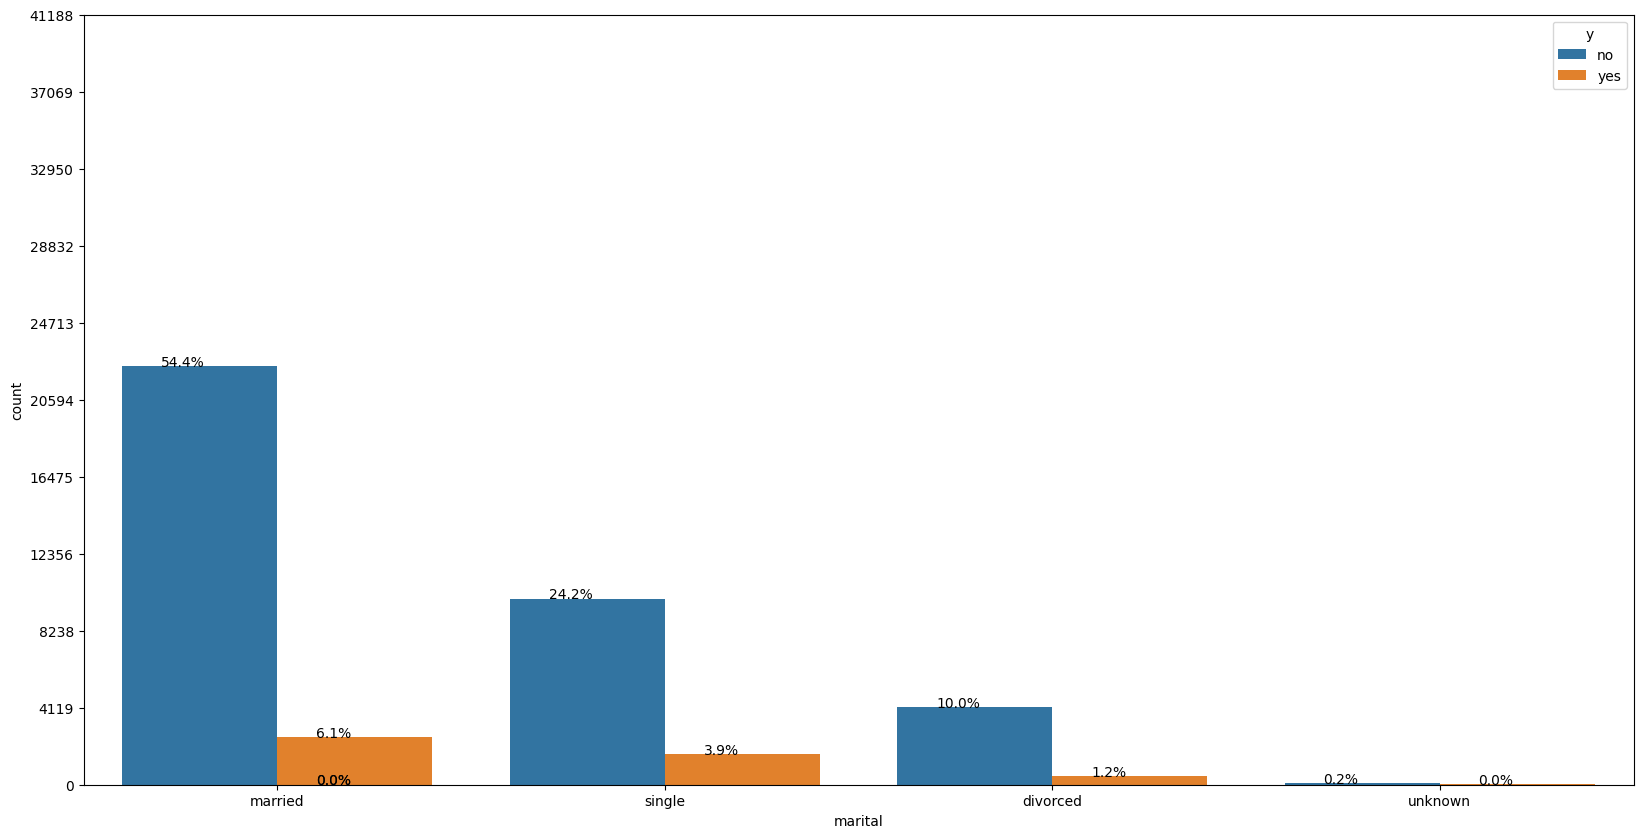

In [ ]:
countplot("job", data)
countplot_withY("job", data)
countplot("marital", data)
countplot_withY("marital", data)



<ipython-input-83-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


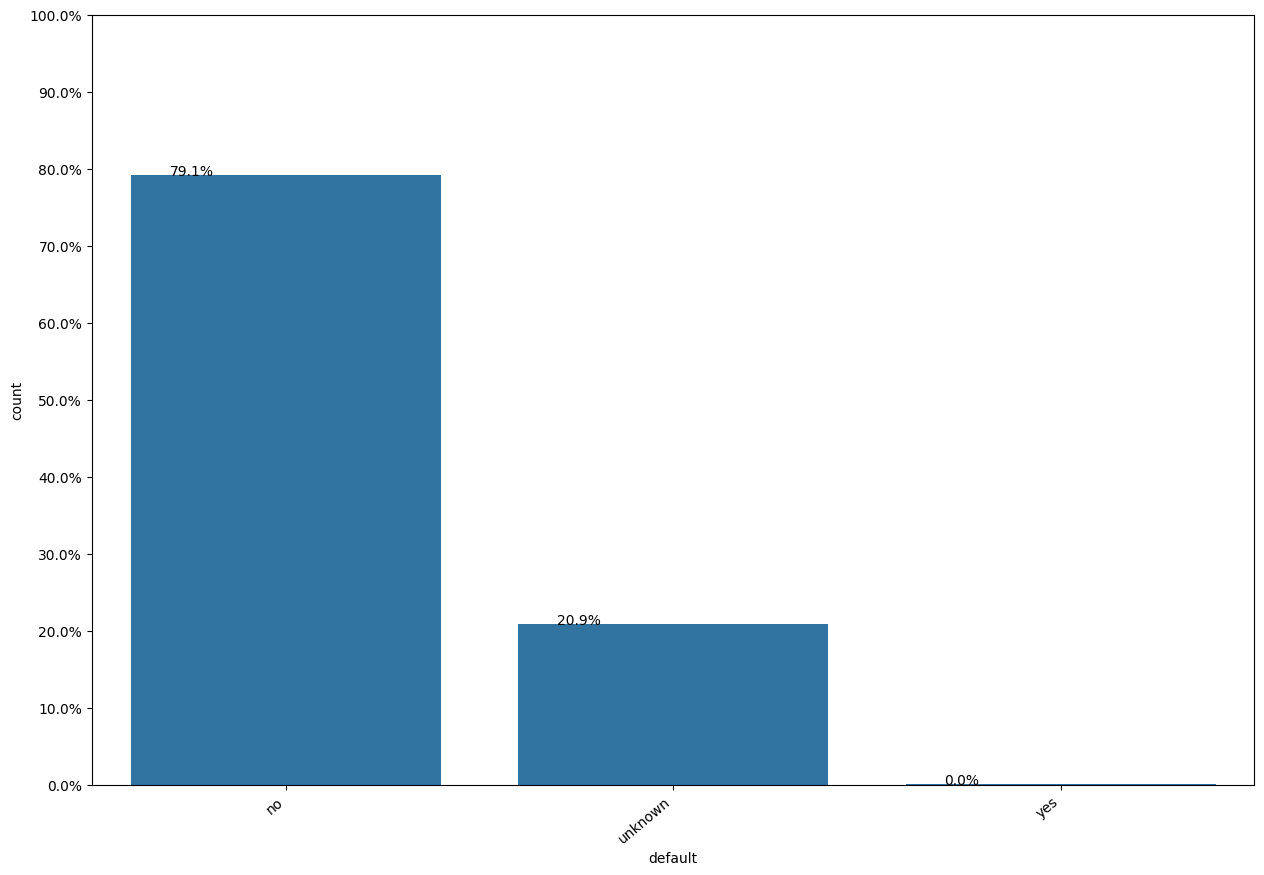

<ipython-input-84-c7b84ce4fc3a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


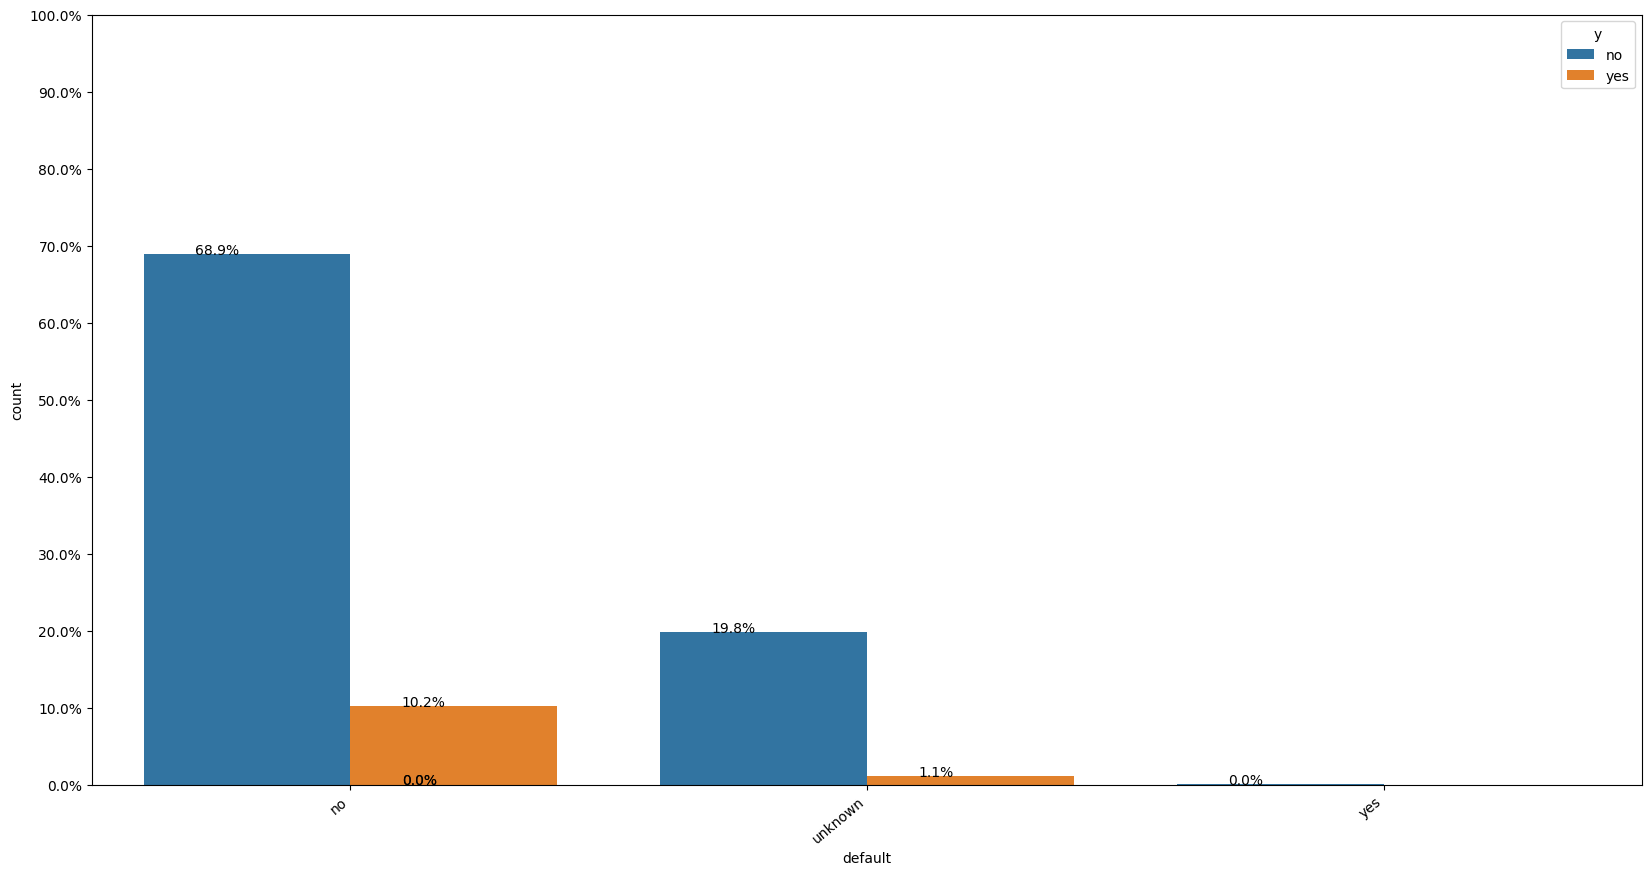

In [ ]:
countplot("default", data)
countplot_withY("default", data)

<ipython-input-83-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


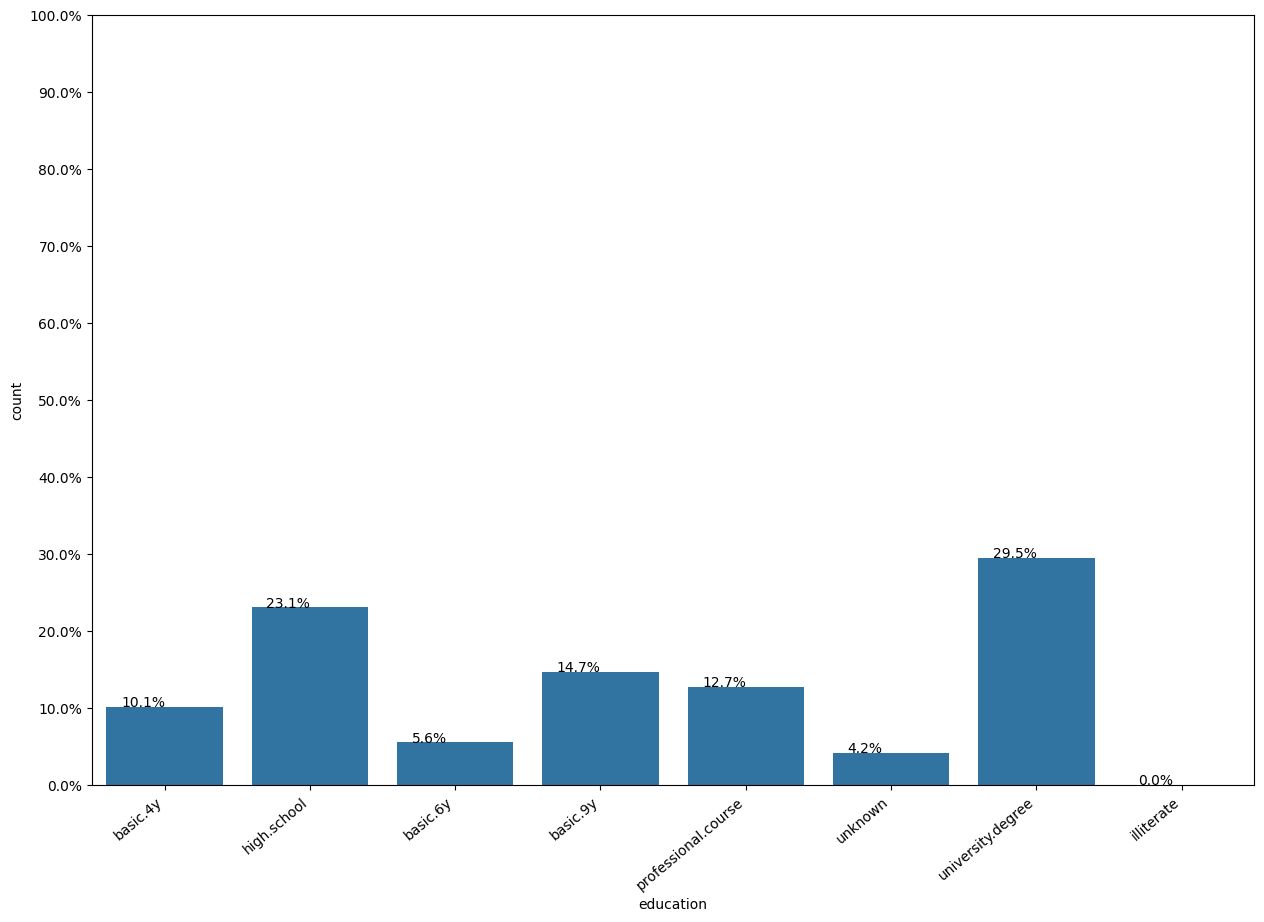

<ipython-input-84-c7b84ce4fc3a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


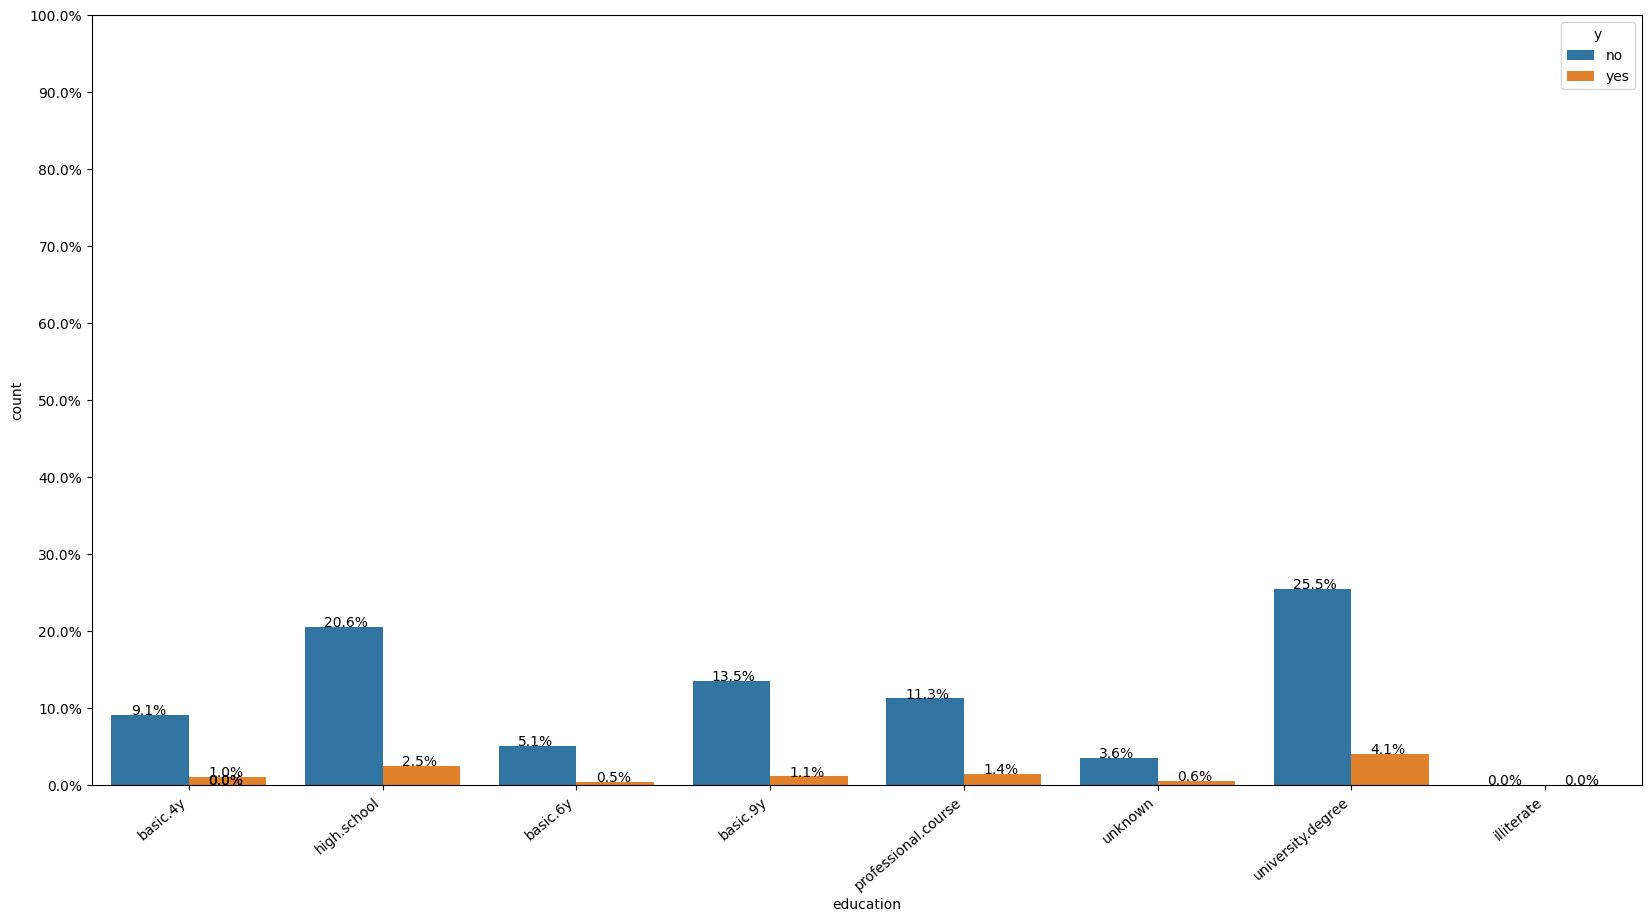

In [ ]:
countplot("education",data)
countplot_withY("education",data)

<ipython-input-83-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


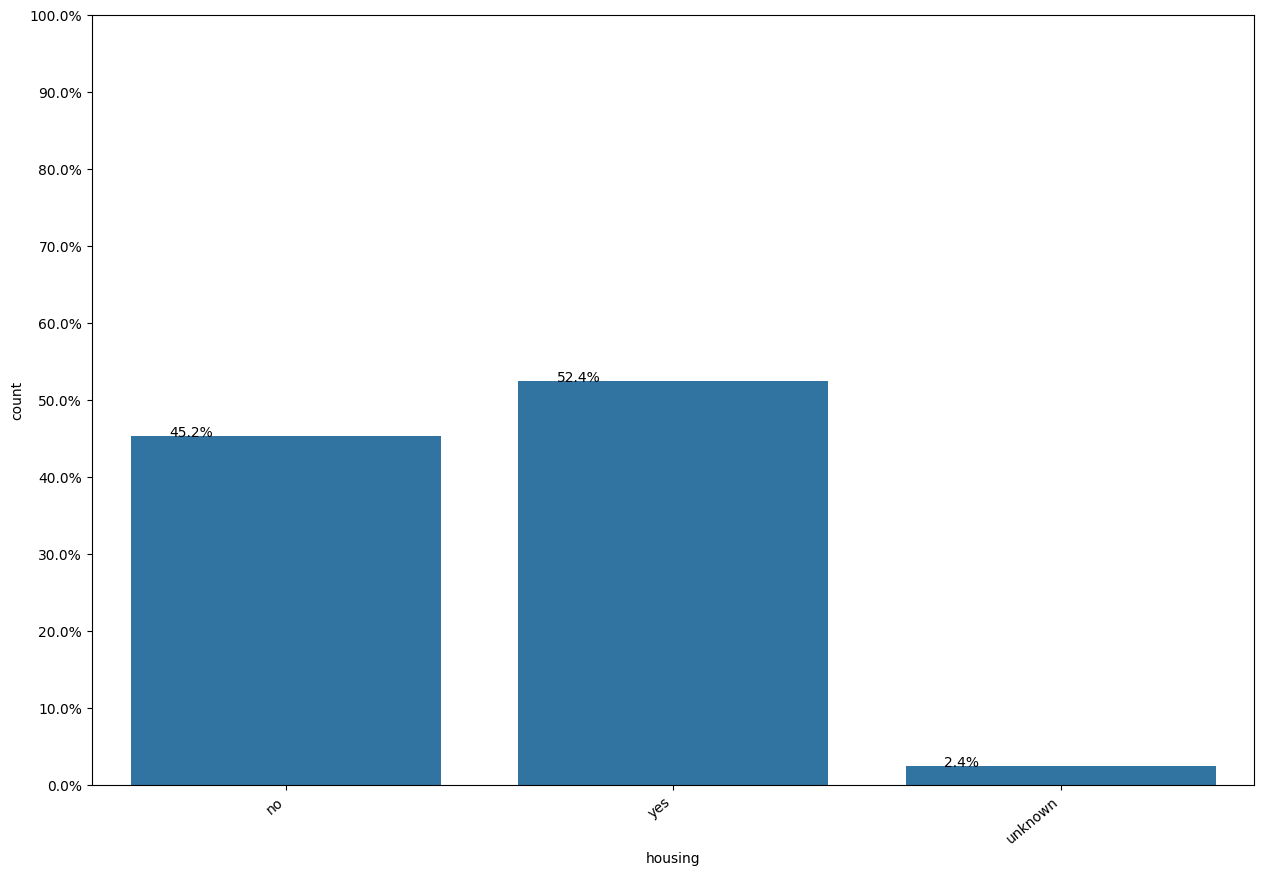

<ipython-input-84-c7b84ce4fc3a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


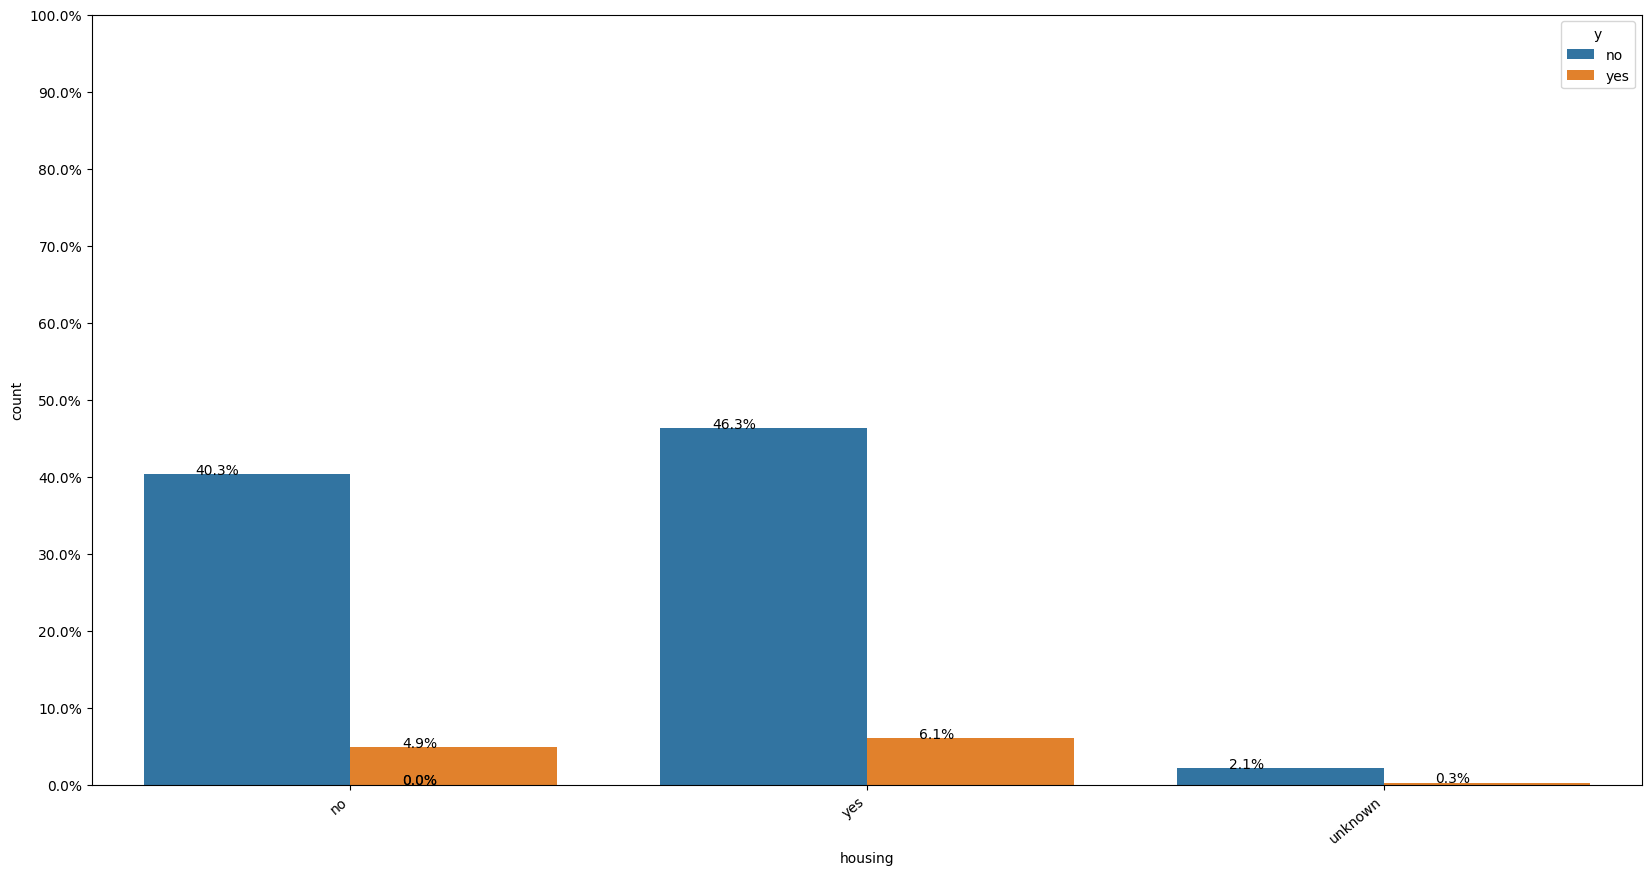

In [ ]:
countplot("housing", data)
countplot_withY("housing", data)

<ipython-input-83-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


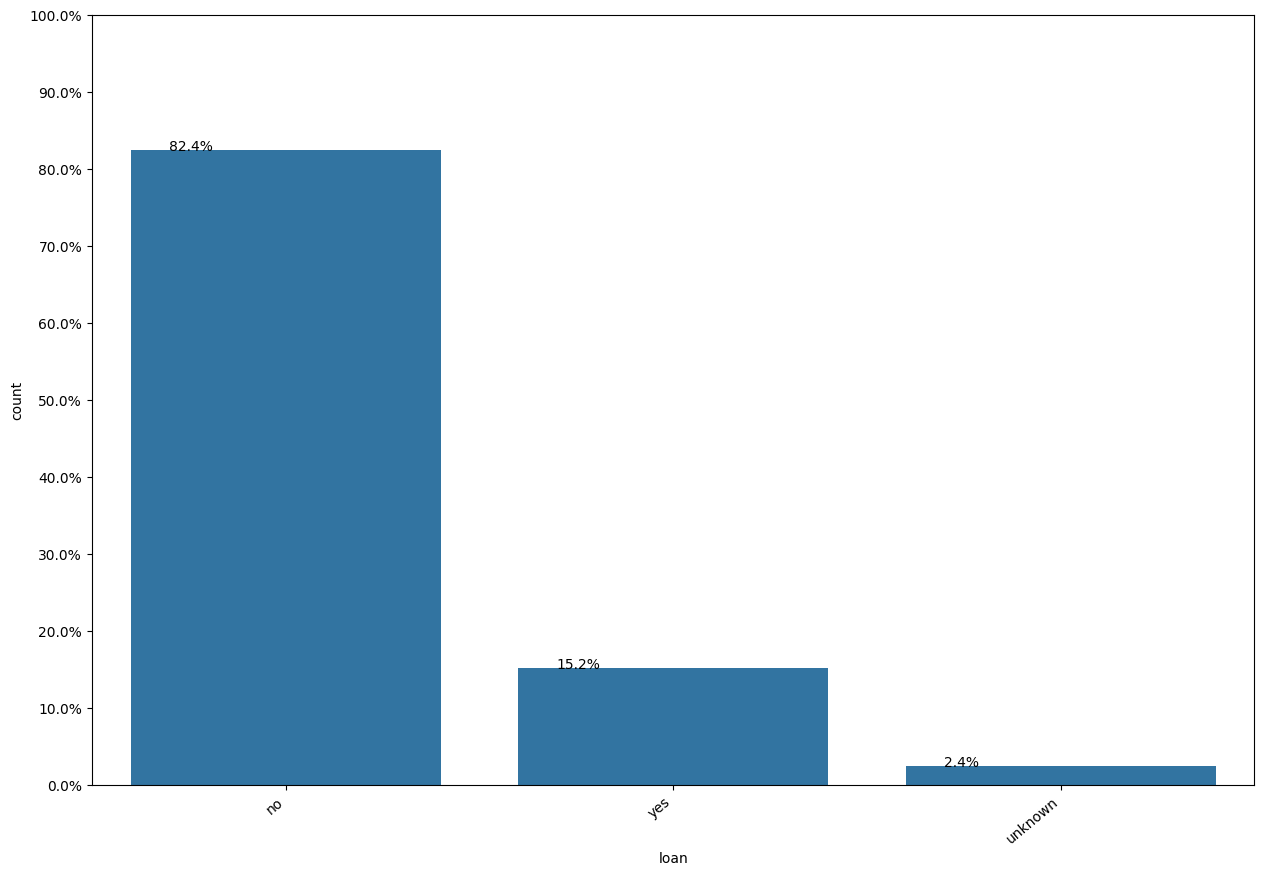

<ipython-input-84-c7b84ce4fc3a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


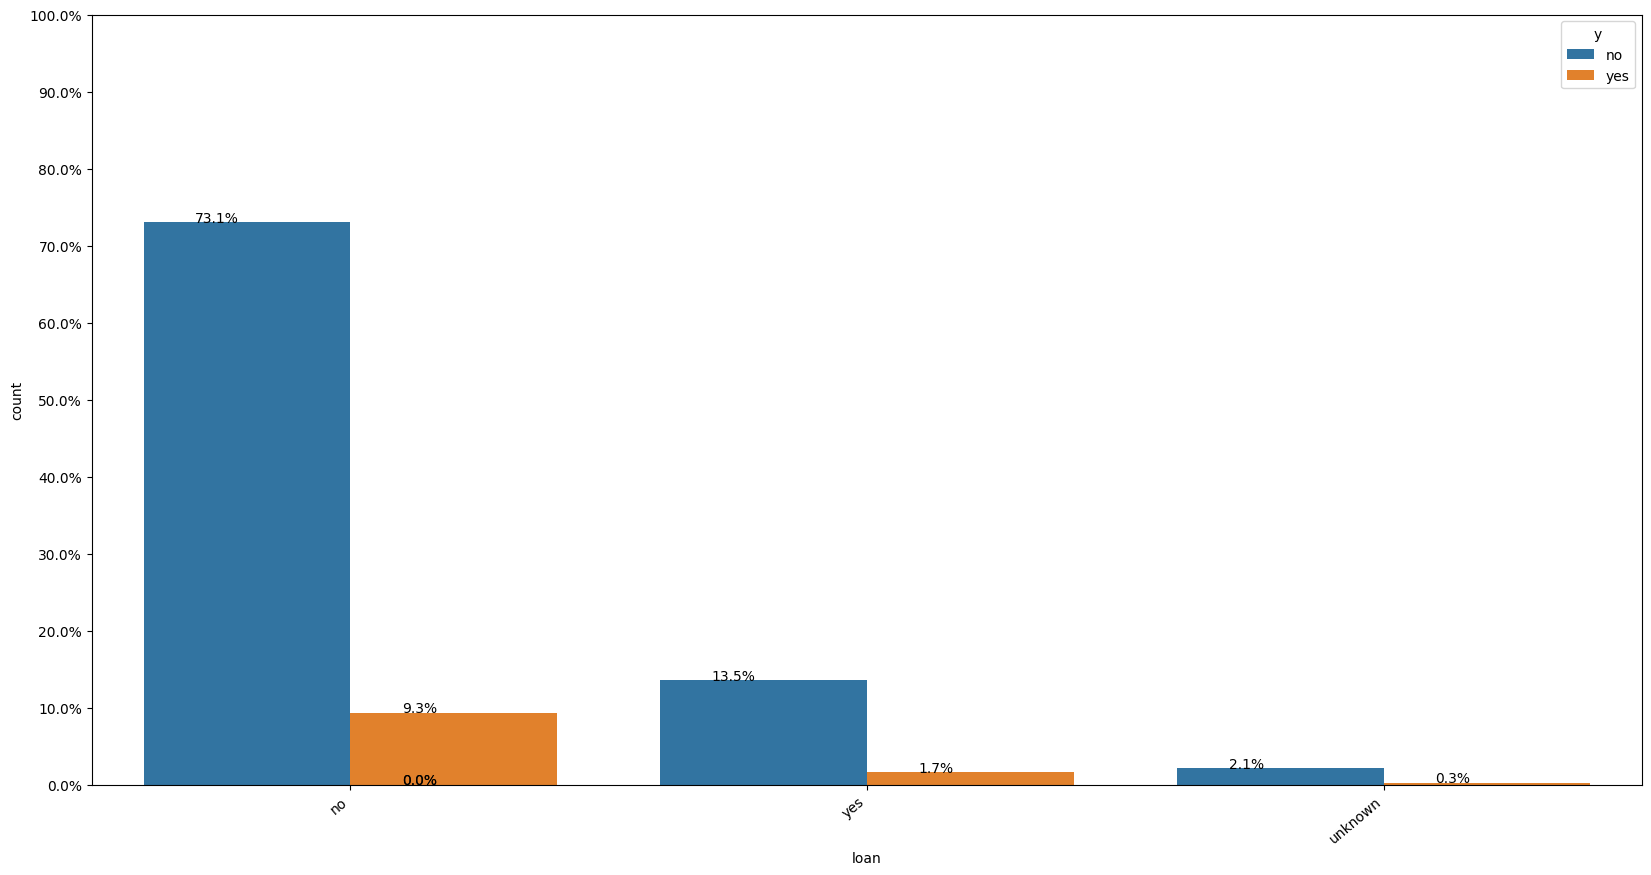

In [ ]:
countplot("loan", data)
countplot_withY("loan", data)

<ipython-input-83-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


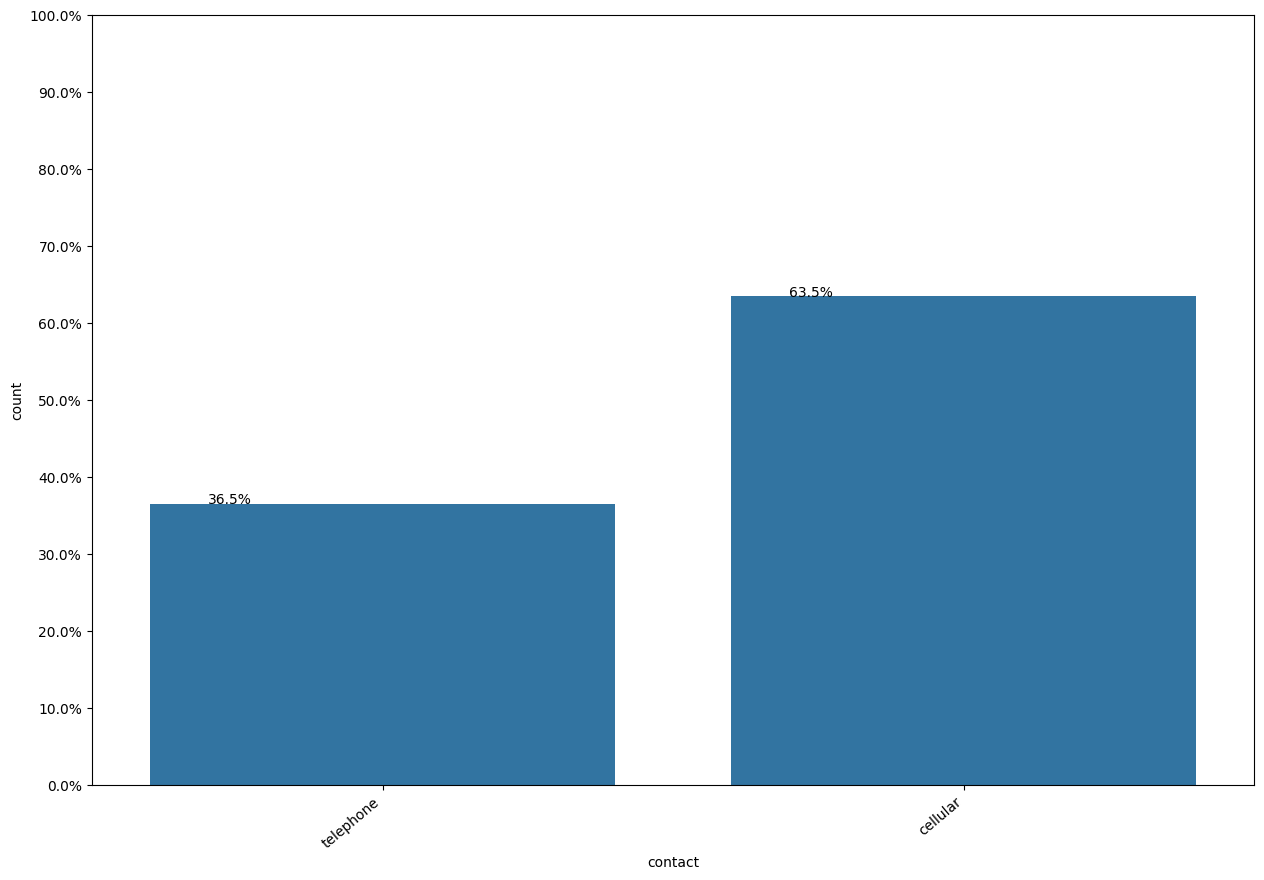

<ipython-input-84-c7b84ce4fc3a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


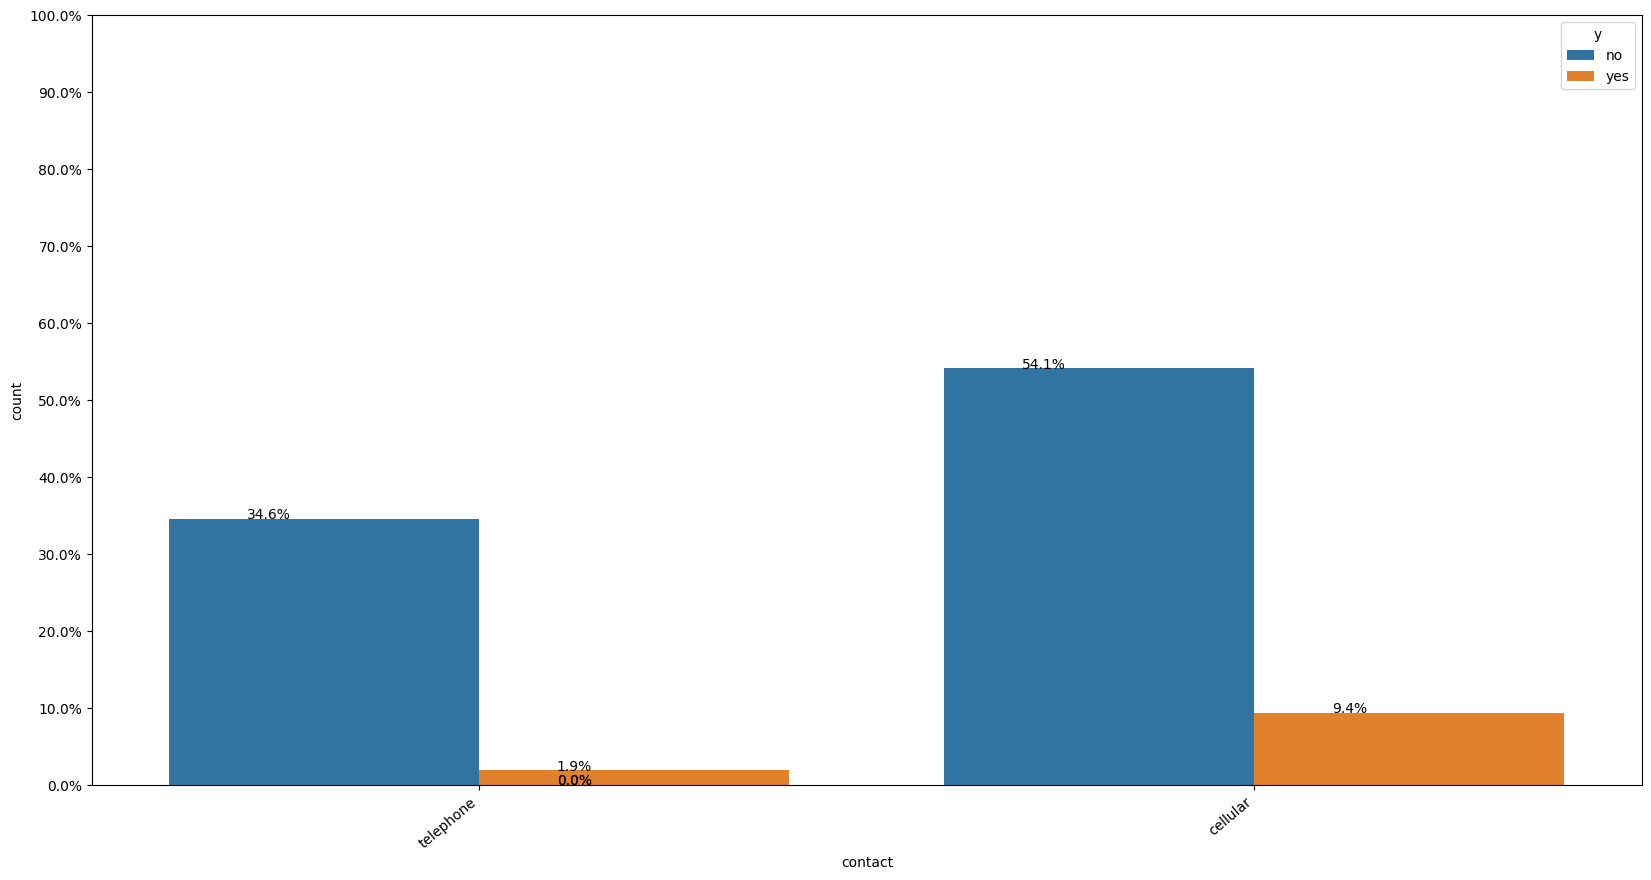

In [ ]:
countplot("contact", data)
countplot_withY("contact", data)

<ipython-input-83-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


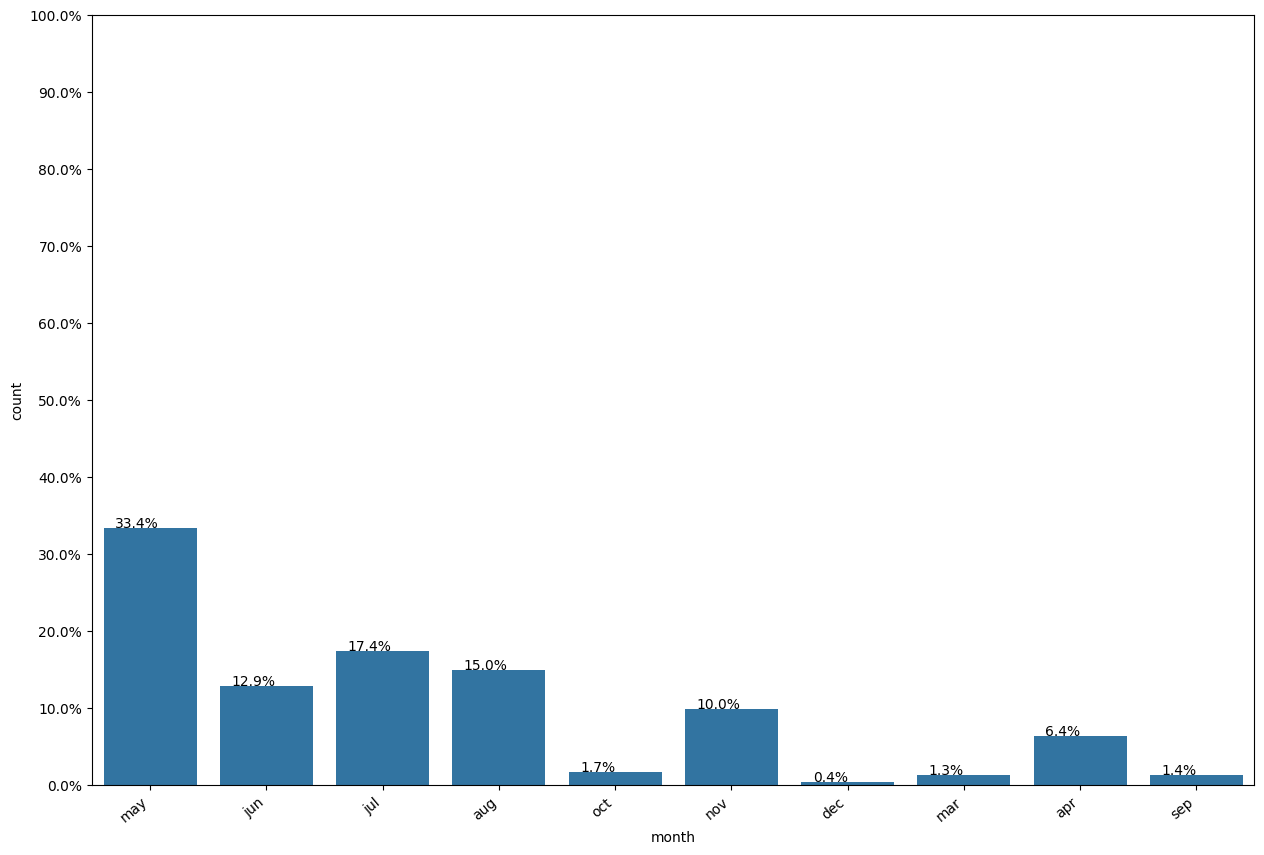

<ipython-input-84-c7b84ce4fc3a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


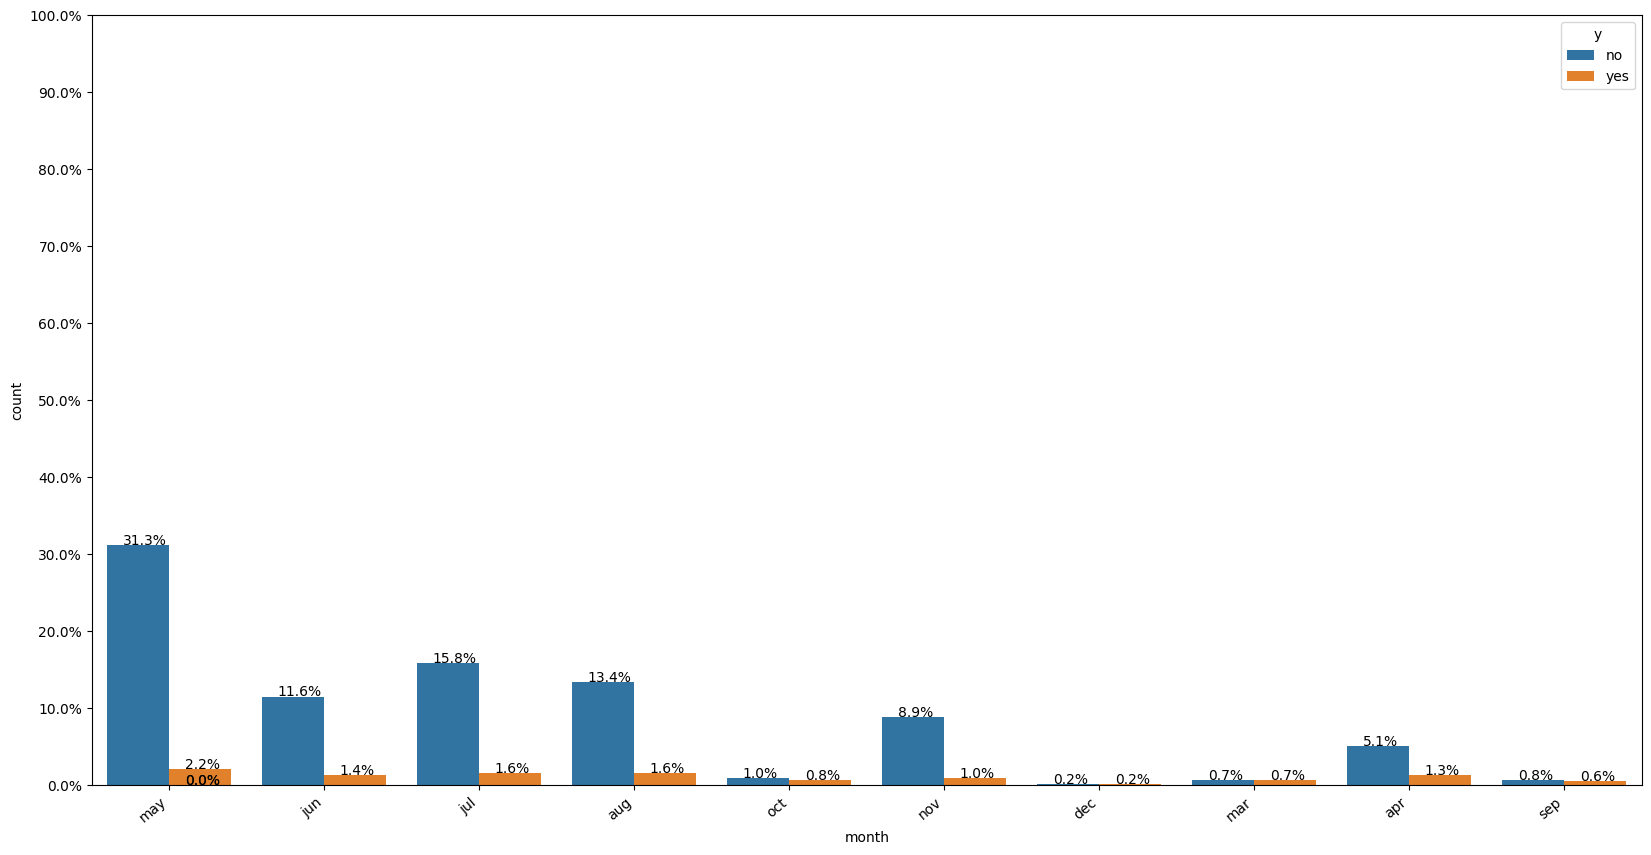

In [ ]:

countplot("month", data)
countplot_withY("month", data)

<ipython-input-83-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


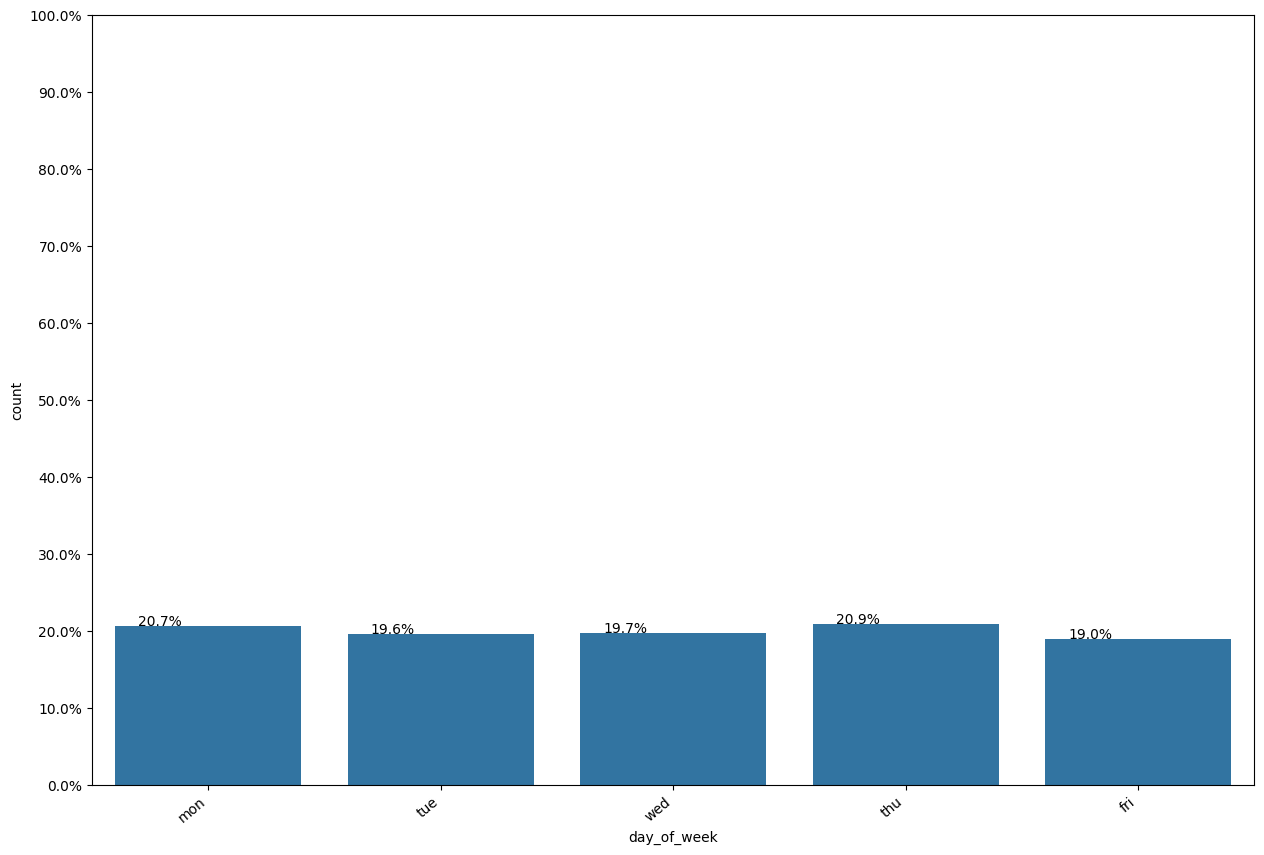

<ipython-input-84-c7b84ce4fc3a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


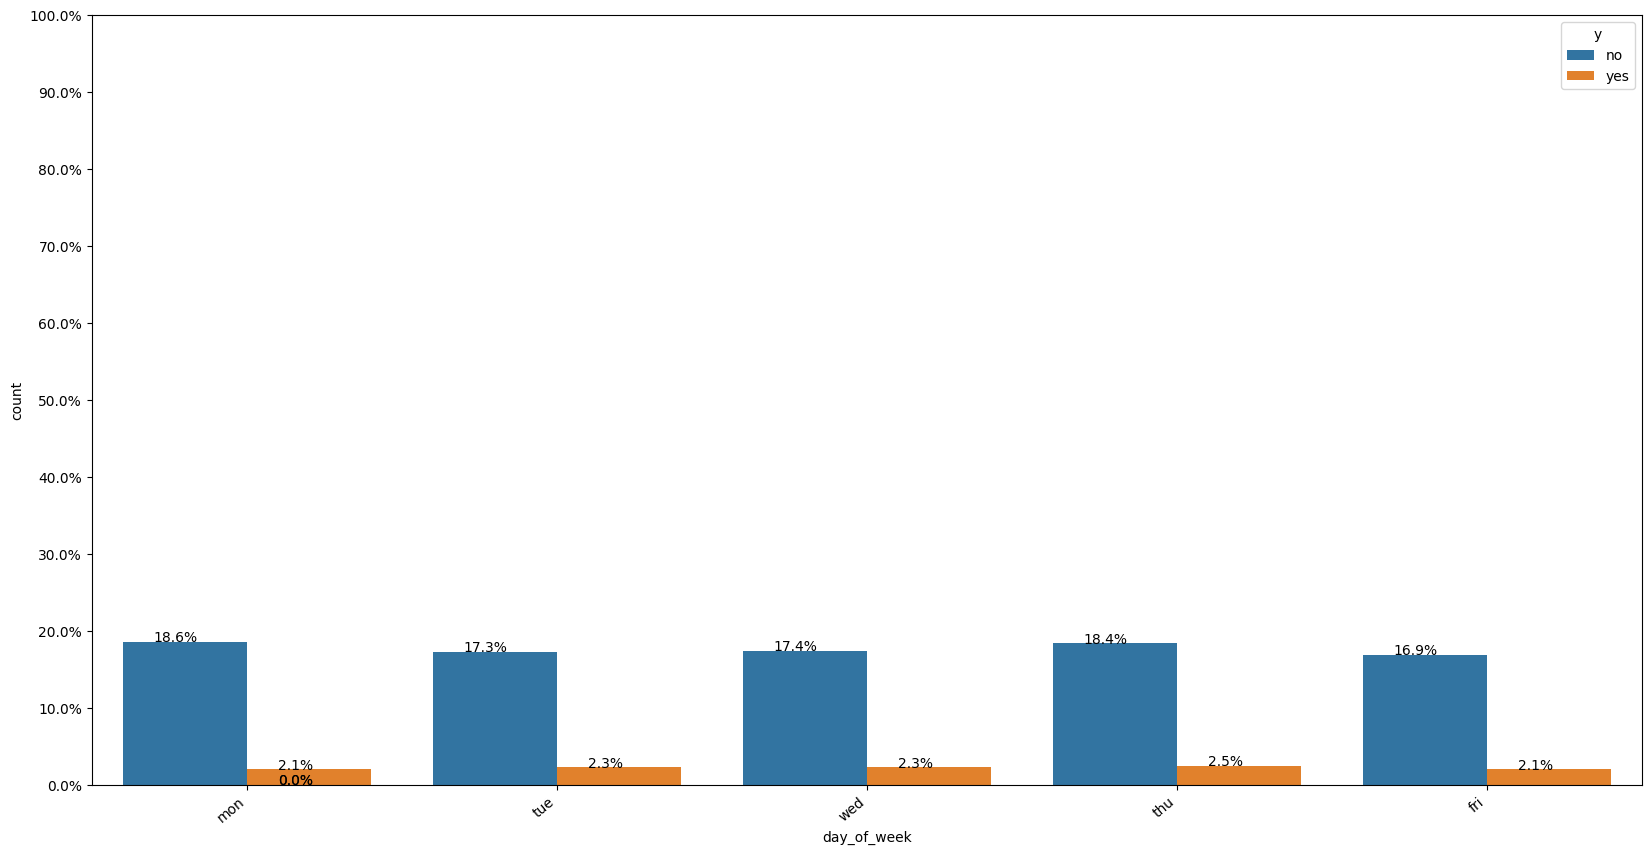

In [ ]:
countplot("day_of_week", data)
countplot_withY("day_of_week", data)

<ipython-input-83-72ee747e2f05>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


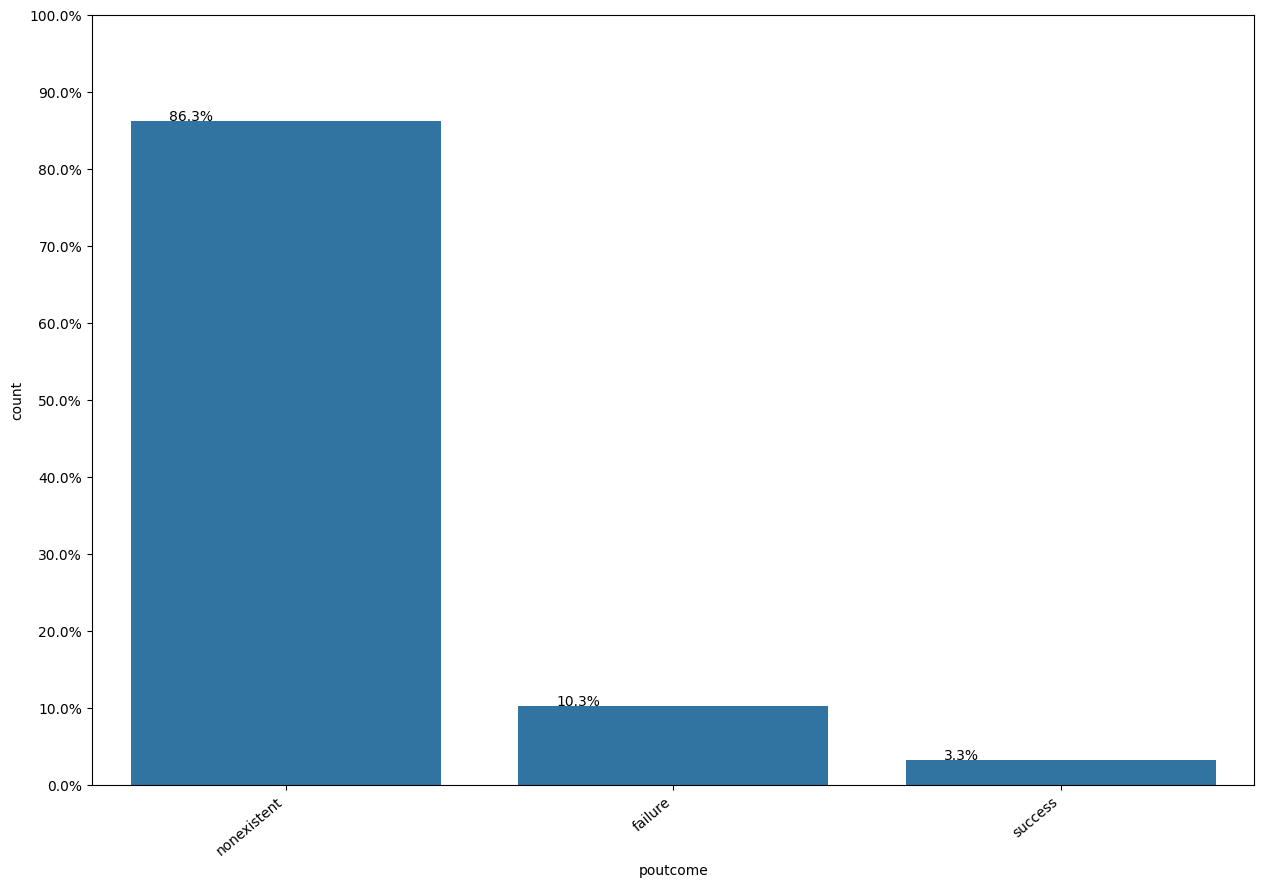

<ipython-input-84-c7b84ce4fc3a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


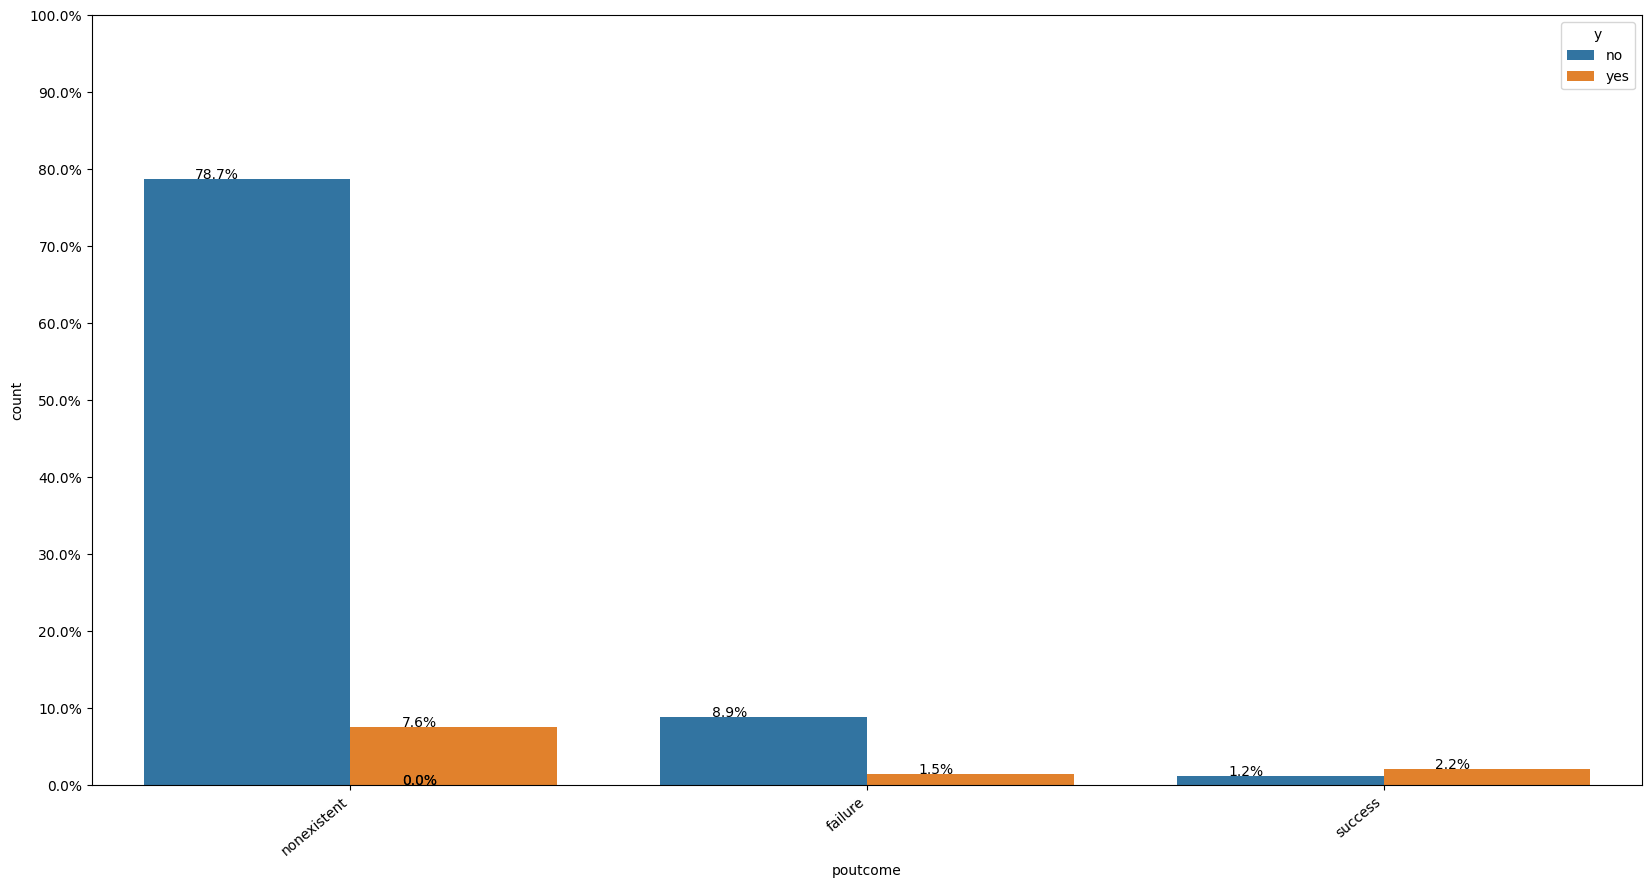

In [ ]:
countplot("poutcome", data)
countplot_withY("poutcome", data)

<ipython-input-97-2fd56025d666>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


<Axes: xlabel='age', ylabel='Density'>

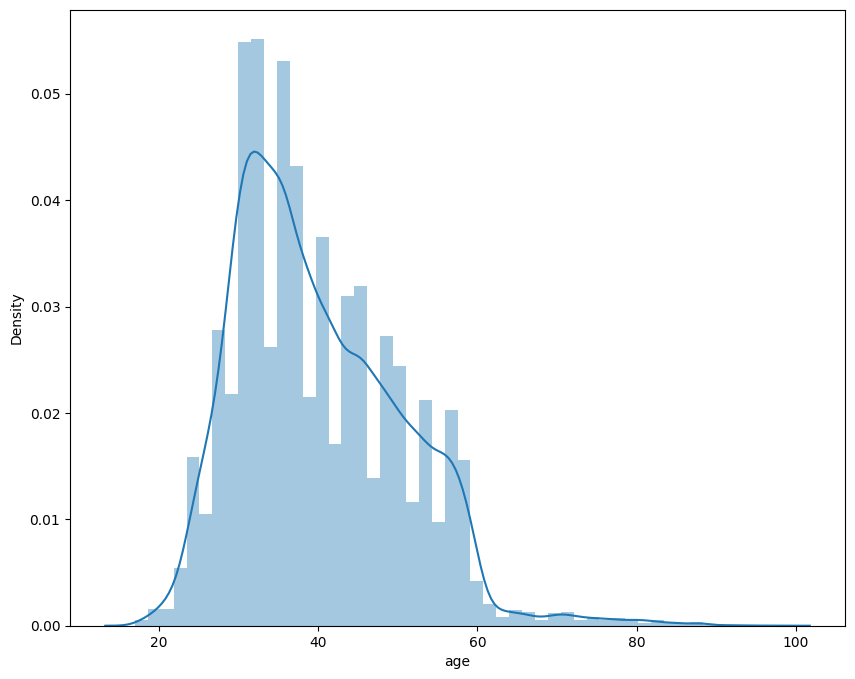

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])


<ipython-input-98-edea28d9effd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["duration"])


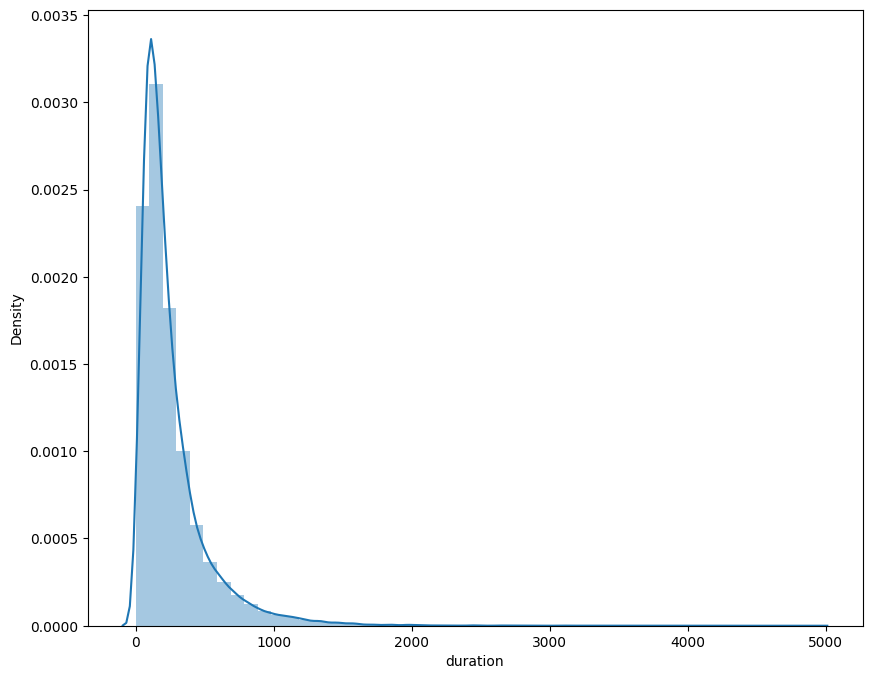

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["duration"])
plt.show()


In [ ]:
data["pdays"].value_counts()


pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

<ipython-input-99-cef63818b483>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["pdays"])


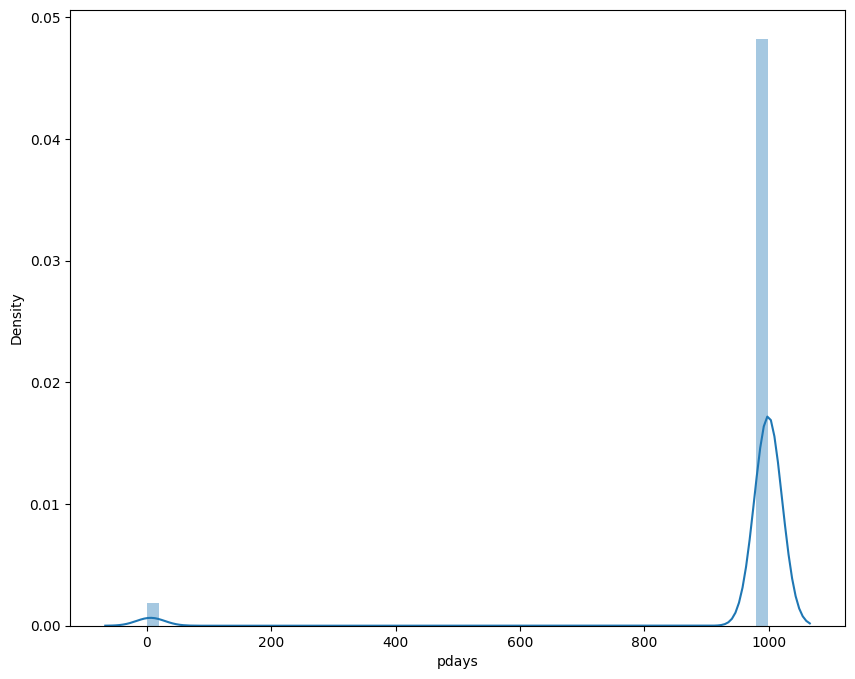

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["pdays"])
plt.show()

In [ ]:
data["emp.var.rate"].value_counts()

emp.var.rate
 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64

<ipython-input-102-ed76f191b6d4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["emp.var.rate"])


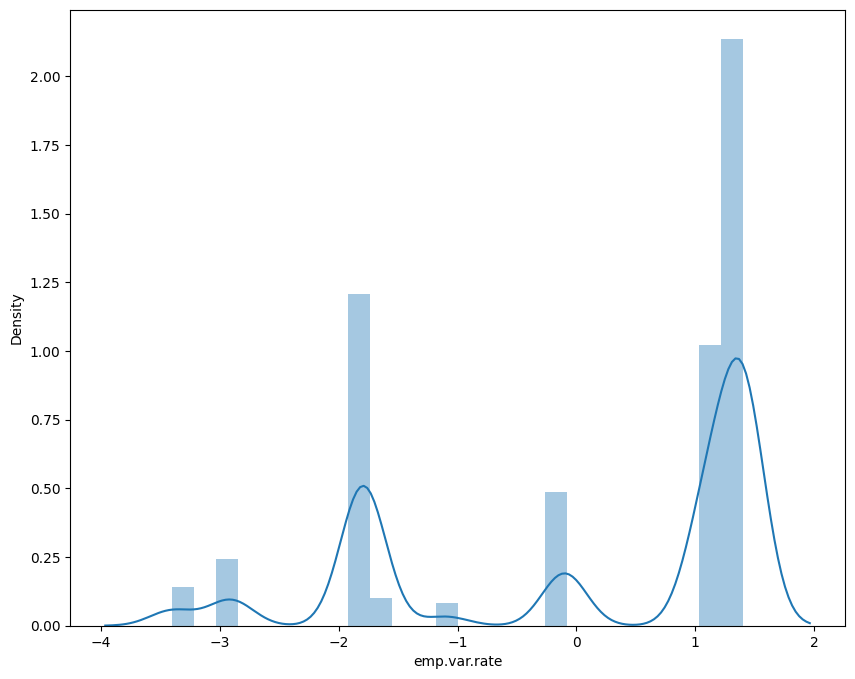

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["emp.var.rate"])
plt.show()


<ipython-input-103-bc046e76a7f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["cons.price.idx"])


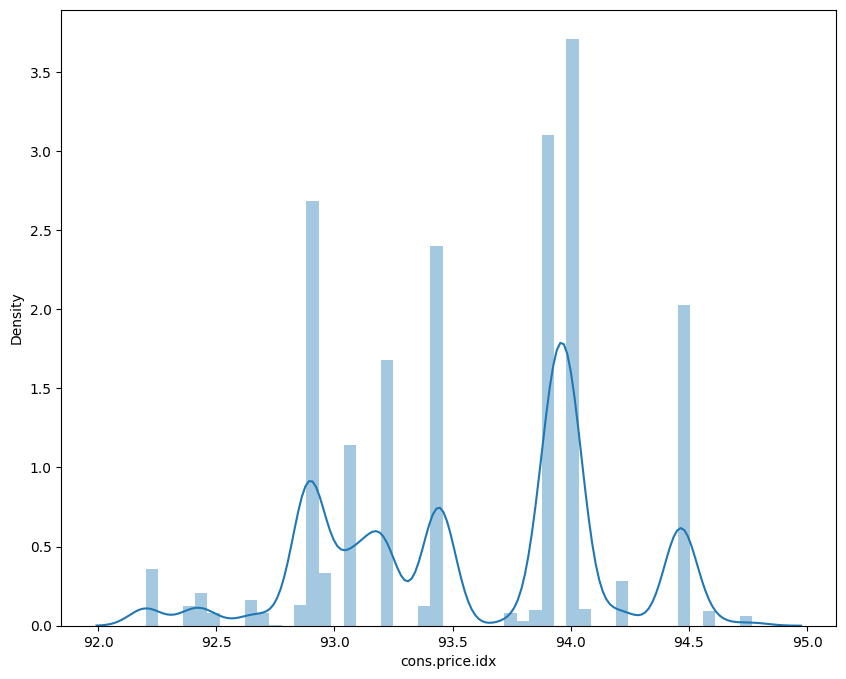

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["cons.price.idx"])
plt.show()


<ipython-input-104-c0e3ad0dfdc3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["euribor3m"])


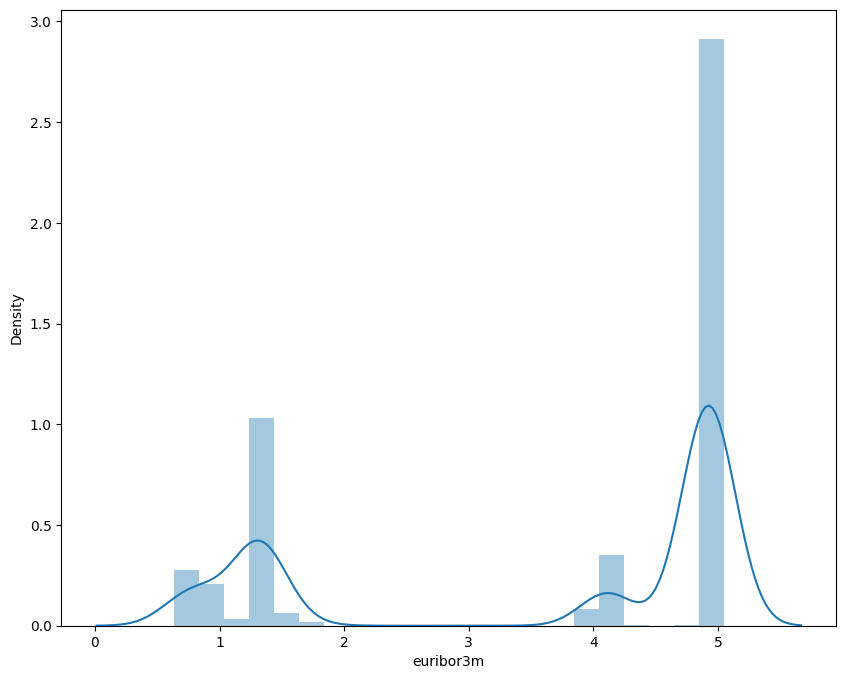

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["euribor3m"])
plt.show()

<ipython-input-105-bc8da2b9b5c5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["nr.employed"])


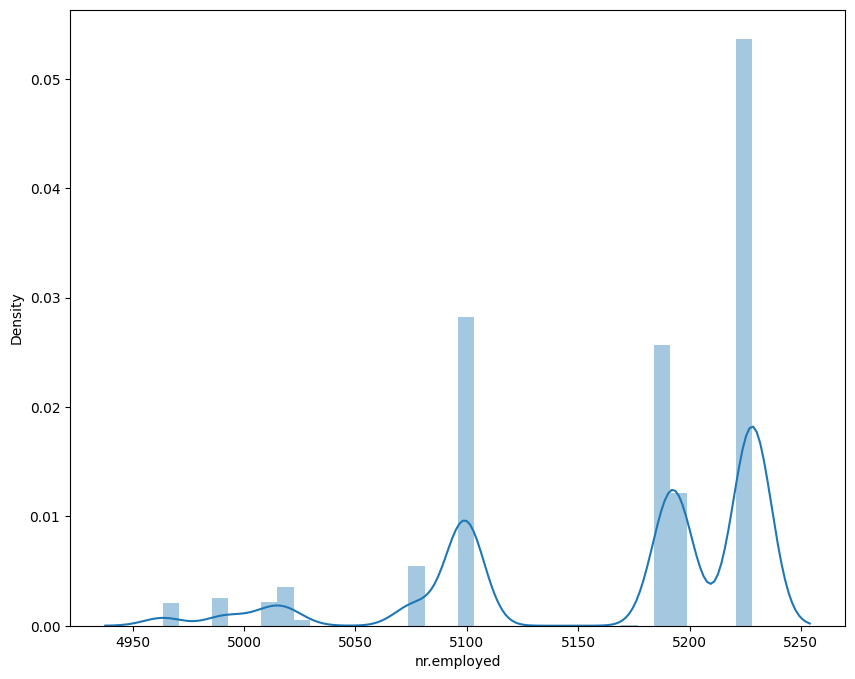

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["nr.employed"])
plt.show()


In [ ]:
Findings
#Admin job people subscribe to the term deposit more.
#Housemaid category subscribe the least
#Married people ,majority do not subscrie the term deposit.
#Degree holders are the majority subscribers.
#Housing loan customers are approached more and there is no increase towards subscribtion.
#For those who have no personal loan had subscribed to some extent than personal loan holders.
#Month of May and day Thursday. had largest number of calls happened and subsription is high.
#Previous outcome success rate was very less



In [ ]:
#Data Preprocessing

In [31]:
data_dup = data[data.duplicated(keep="last")]
data_dup


age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1265   telephone   may         thu  ...         1    999         0   
12260  telephone   jul         thu  ...         1    999         0   
14155   cellular   jul         mon  ...         2    999         0   
16819   cellular   jul         thu  ...         3    999         0   
18464   cellular   jul         thu  ...         1    999         0   
20072   cellular   aug         mon  ...         1    999         0   
20531   cellular   aug         tue  ...         1    999         0   
25183   cellular   nov         tue  ...         2    999         0   
28476   cellular   apr         tue  ...         1    999         0   
32505   cellular   may         fri  ...         4    999         0   
36950   cellular   jul         thu  ...         1    999         0   
38255  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1265   nonexistent          1.1          93.994          -36.4      4.855   
12260  nonexistent          1.4          93.918          -42.7      4.966   
14155  nonexistent          1.4          93.918          -42.7      4.962   
16819  nonexistent          1.4          93.918          -42.7      4.962   
18464  nonexistent          1.4          93.918          -42.7      4.968   
20072  nonexistent          1.4          93.444          -36.1      4.965   
20531  nonexistent          1.4          93.444          -36.1      4.966   
25183  nonexistent         -0.1          93.200          -42.0      4.153   
28476  nonexistent         -1.8          93.075          -47.1      1.423   
32505  nonexistent         -1.8          92.893          -46.2      1.313   
36950  nonexistent         -2.9          92.469          -33.6      1.072   
38255  nonexistent         -3.4          92.431          -26.9      0.742   

       nr.employed    y  
1265        5191.0   no  
12260       5228.1   no  
14155       5228.1   no  
16819       5228.1   no  
18464       5228.1   no  
20072       5228.1   no  
20531       5228.1   no  
25183       5195.8   no  
28476       5099.1   no  
32505       5099.1   no  
36950       5076.2  yes  
38255       5017.5   no  

[12 rows x 21 columns]

In [32]:
df2=data.drop_duplicates()

In [33]:
df2.shape

(41176, 21)

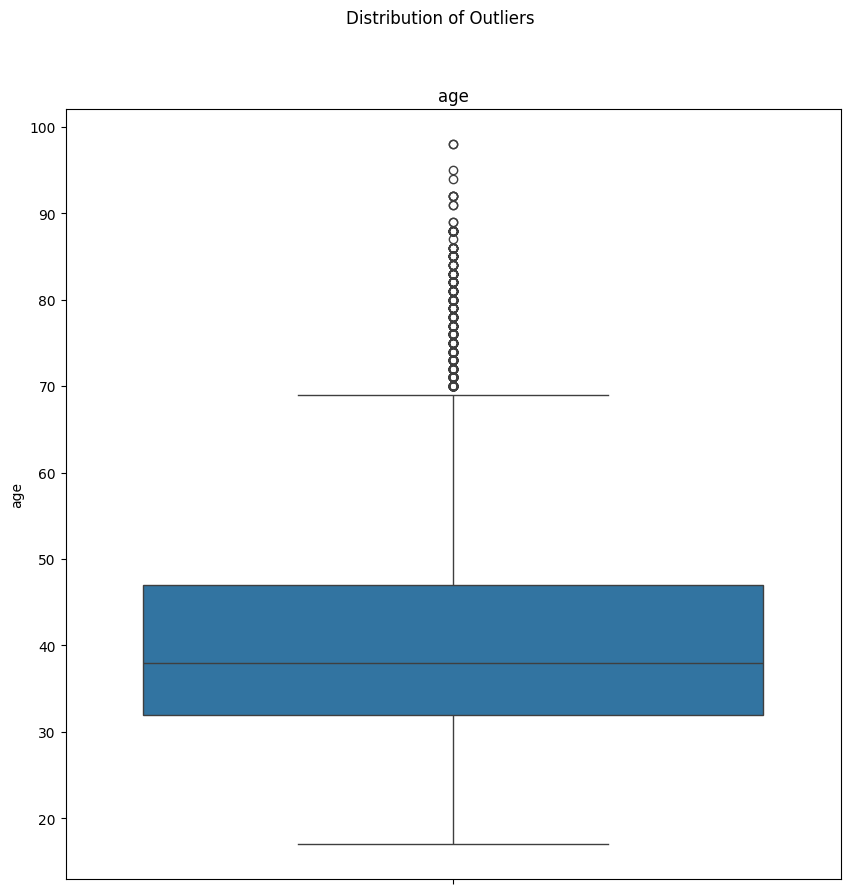

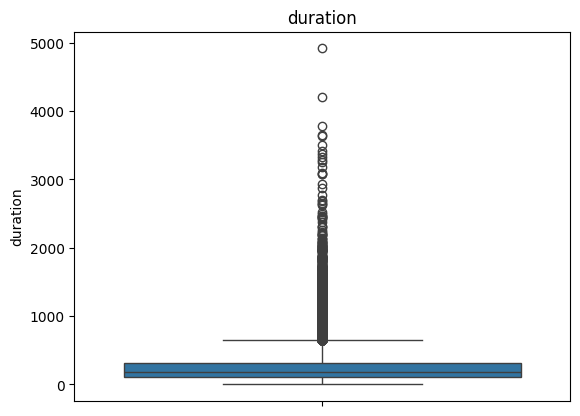

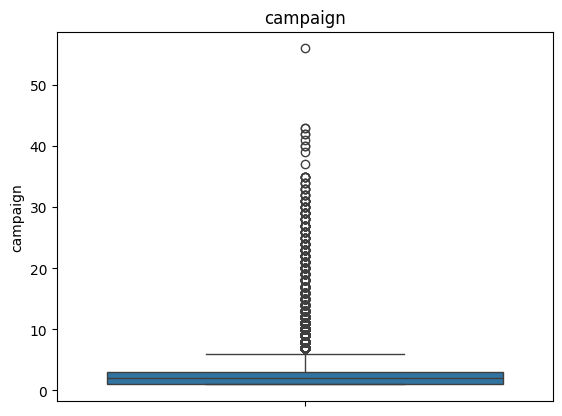

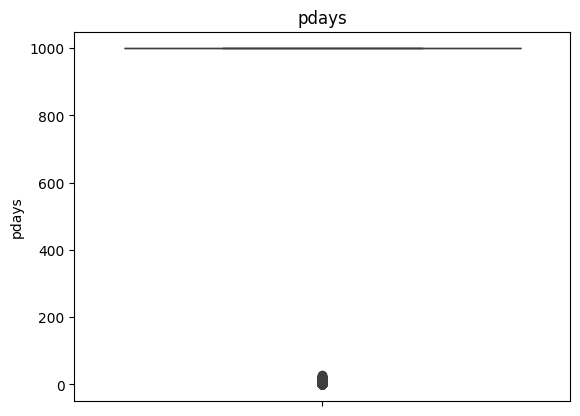

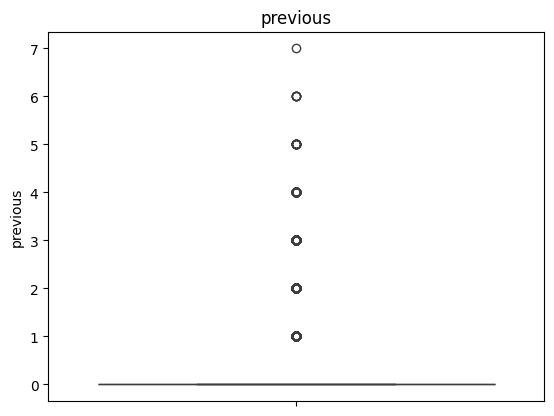

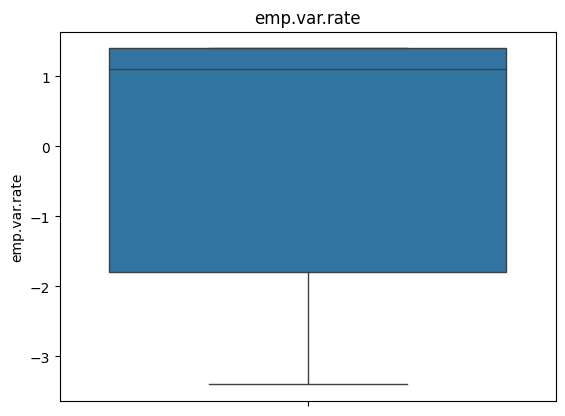

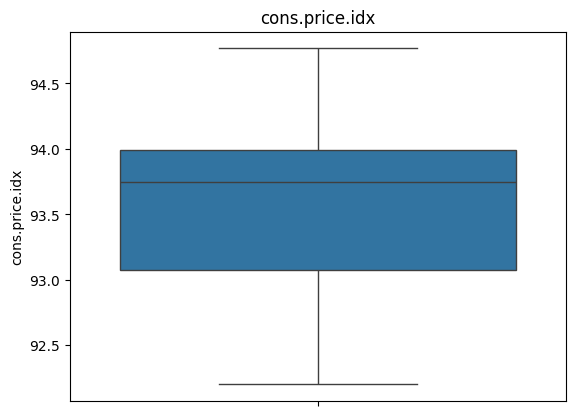

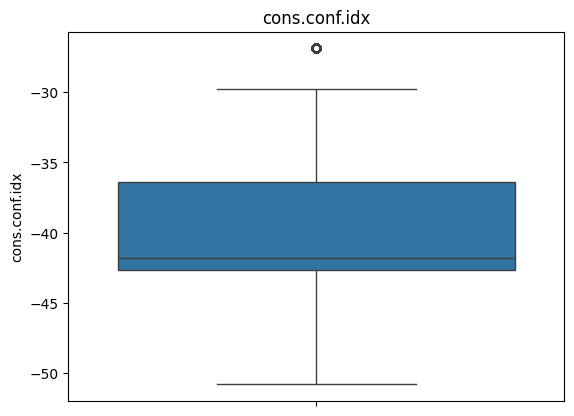

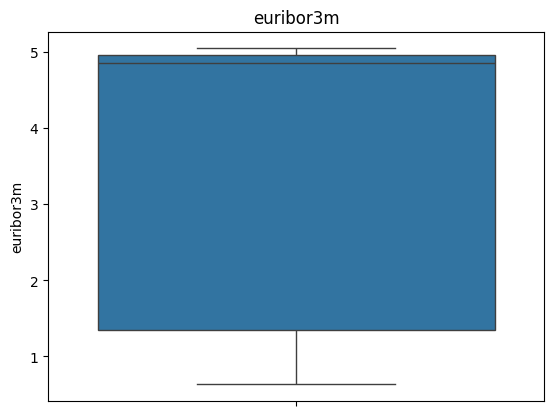

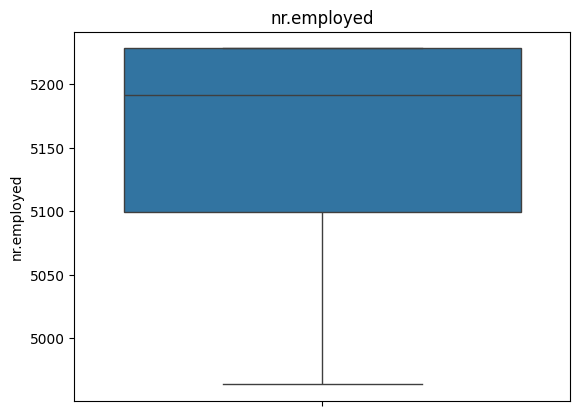

In [34]:
#Outlier Detection
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")
for i in df2.columns:
   if((df2[i].dtype == 'int64') | (df2[i].dtype == 'float64')):
    # Set the title of the plot
    plt.title(i)
    sns.boxplot(df2[i])
    plt.show()

In [ ]:
#duration and campaign shows maximum number of outliers

job


the values are:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64



marital


the values are:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64



education


the values are:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64



default


the values are:
default
no     44396
yes      815
Name: count, dtype: int64



housing


the values are:
housing
yes    25130
no     20081
Name: count, dtype: int64



loan


the values are:
loan
no     37967
yes     7244
Name: count, dtype: int64



contact


the values are:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64



month


the values are:
month
may    137

In [35]:
# Calculating the interquartile range (IQR) of the column 'duration' in the dataframe df2
# 25th percentile value
q25 = np.percentile(df2['duration'], 25)

# 75th percentile value
q75 = np.percentile(df2['duration'], 75)

# Interquartile range
iqr = q75 - q25

# Calculating the cutoff value using 1.5 times the IQR
cutoff = 1.5 * iqr
# Calculating the lower limit using the 25th percentile value minus the cutoff value
lower = q25 - cutoff
# Calculating the upper limit using the 75th percentile value plus the cutoff value
upper = q75 + cutoff

In [36]:
# Printing the lower and upper limits
print(f'The Lower Limit is : {lower}, The Upper Limit is : {upper}')

The Lower Limit is : -223.5, The Upper Limit is : 644.5


In [37]:
print('The Number of Above Upper Limits :' ,len(df2[df2['duration'] > upper]))
print('The Number of Below Lower Limits :' ,len(df2[df2['duration'] < lower]))

The Number of Above Upper Limits : 2963
The Number of Below Lower Limits : 0


In [38]:
# Removing the outliers
outliers = df2[(df2['duration'] > upper)]
df2.drop(outliers.index, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df2.shape)

New Shape:  (38213, 21)


<ipython-input-38-c6d2d79785fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(outliers.index, inplace=True)


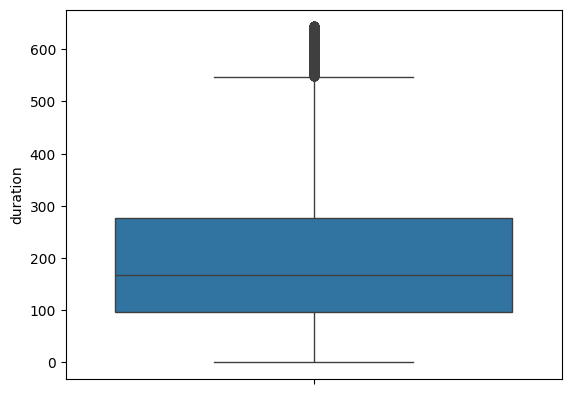

In [39]:
sns.boxplot(df2['duration'])
plt.show()

In [ ]:
#df3=df2.copy()

In [ ]:
# Calculating the interquartile range (IQR) of the column 'duration' in the dataframe df2
# 25th percentile value
#q25 = np.percentile(df3['campaign'], 25)

# 75th percentile value
#q75 = np.percentile(df3['campaign'], 75)

# Interquartile range
#iqr = q75 - q25

# Calculating the cutoff value using 1.5 times the IQR
#cutoff = 1.5 * iqr
# Calculating the lower limit using the 25th percentile value minus the cutoff value
#lower = q25 - cutoff
# Calculating the upper limit using the 75th percentile value plus the cutoff value
#upper = q75 + cutoff

In [ ]:
# Printing the lower and upper limits
#print(f'The Lower Limit is : {lower}, The Upper Limit is : {upper}')

The Lower Limit is : -2.0, The Upper Limit is : 6.0


In [ ]:
#print('The Number of Above Upper Limits :' ,len(df3[df3['duration'] > upper]))
#print('The Number of Below Lower Limits :' ,len(df3[df3['duration'] < lower]))

In [41]:
for i in df2.columns:
  if(df2[i].dtypes == 'object'):
    print(i)
    print(df2[i].nunique())

job
12
marital
4
education
8
default
3
housing
3
loan
3
contact
2
month
10
day_of_week
5
poutcome
3
y
2


In [61]:
df_new=df2.copy()

In [62]:
label = LabelEncoder()
df_new.job = label.fit_transform(df_new.job)
df_new.marital = label.fit_transform(df_new.marital)
df_new.education = label.fit_transform(df_new.education)
df_new.housing = label.fit_transform(df_new.housing)
df_new.loan = label.fit_transform(df_new.loan)
df_new.contact = label.fit_transform(df_new.contact)
df_new.month = label.fit_transform(df_new.month)
df_new.day_of_week = label.fit_transform(df_new.day_of_week)
df_new.poutcome = label.fit_transform(df_new.poutcome)
df_new.y = label.fit_transform(df_new.y)


In [63]:
df_new.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0       no        0     0        1      6   
1   57    7        1          3  unknown        0     0        1      6   
2   37    7        1          3       no        2     0        1      6   
3   40    0        1          1       no        0     0        1      6   
4   56    7        1          3       no        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [64]:
df_mod=df_new.drop(['y'],axis=1)

In [65]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
stdsclr=StandardScaler()
X2 = df_mod[num_columns]
X2=pd.DataFrame(X2,columns=num_columns)

In [66]:
X2=stdsclr.fit_transform(X2)

In [67]:
X2 = pd.DataFrame(X2, columns=num_columns)

In [68]:
X2.head()

age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.530104  0.409358 -0.560683  0.193051 -0.350278      0.647812   
1  1.626031 -0.384834 -0.560683  0.193051 -0.350278      0.647812   
2 -0.292505  0.161173 -0.560683  0.193051 -0.350278      0.647812   
3 -0.004724 -0.370652 -0.560683  0.193051 -0.350278      0.647812   
4  1.530104  0.735544 -0.560683  0.193051 -0.350278      0.647812   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.723885       0.881084   0.711928     0.331176  
1        0.723885       0.881084   0.711928     0.331176  
2        0.723885       0.881084   0.711928     0.331176  
3        0.723885       0.881084   0.711928     0.331176  
4        0.723885       0.881084   0.711928     0.331176

In [ ]:
#X=pd.concat([X2,df_mod[cat_columns]],axis=1)


In [ ]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
